In [ ]:
#importing necessary libraries

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from google.colab import files
from sklearn.impute import SimpleImputer

In [ ]:
# loading the dataset
file = files.upload() # the function "upload" from package "files" uploads local file into google colab session

Saving train.csv to train.csv


In [ ]:
data = pd.read_csv('train.csv')
data.head()

,Id,Product_Info_1,Product_Info_2,Product_Info_3,Product_Info_4,Product_Info_5,Product_Info_6,Product_Info_7,Ins_Age,Ht,...,Medical_Keyword_40,Medical_Keyword_41,Medical_Keyword_42,Medical_Keyword_43,Medical_Keyword_44,Medical_Keyword_45,Medical_Keyword_46,Medical_Keyword_47,Medical_Keyword_48,Response
0,2,1,D3,10,0.076923,2,1,1,0.641791,0.581818,...,0,0,0,0,0,0,0,0,0,8
1,5,1,A1,26,0.076923,2,3,1,0.059701,0.600000,...,0,0,0,0,0,0,0,0,0,4
2,6,1,E1,26,0.076923,2,3,1,0.029851,0.745455,...,0,0,0,0,0,0,0,0,0,8
3,7,1,D4,10,0.487179,2,3,1,0.164179,0.672727,...,0,0,0,0,0,0,0,0,0,8
4,8,1,D2,26,0.230769,2,3,1,0.417910,0.654545,...,0,0,0,0,0,0,0,0,0,8


In [ ]:
# Basic statistics of the dataset
basic_stats = data.describe()
print(basic_stats)

                 Id  Product_Info_1  Product_Info_3  Product_Info_4  \
count  59381.000000    59381.000000    59381.000000    59381.000000   
mean   39507.211515        1.026355       24.415655        0.328952   
std    22815.883089        0.160191        5.072885        0.282562   
min        2.000000        1.000000        1.000000        0.000000   
25%    19780.000000        1.000000       26.000000        0.076923   
50%    39487.000000        1.000000       26.000000        0.230769   
75%    59211.000000        1.000000       26.000000        0.487179   
max    79146.000000        2.000000       38.000000        1.000000   

       Product_Info_5  Product_Info_6  Product_Info_7       Ins_Age  \
count    59381.000000    59381.000000    59381.000000  59381.000000   
mean         2.006955        2.673599        1.043583      0.405567   
std          0.083107        0.739103        0.291949      0.197190   
min          2.000000        1.000000        1.000000      0.000000   
25%  

*   The dataset contains 59,381 entries and 128 features.
*   Features like Ins_Age, Ht (Height), Wt (Weight), and BMI are normalized, showing a range from 0 to 1.
*  Other features, particularly those related to medical history and product information, are either categorical or binary.

In [ ]:
# Target variable distribution
response_distribution = data['Response'].value_counts(normalize=True)
print(response_distribution)

Response
8    0.328203
6    0.189168
7    0.135178
2    0.110338
1    0.104528
5    0.091477
4    0.024048
3    0.017059
Name: proportion, dtype: float64


<ipython-input-59-80dfa2620cc1>:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=data['Response'], palette="viridis")


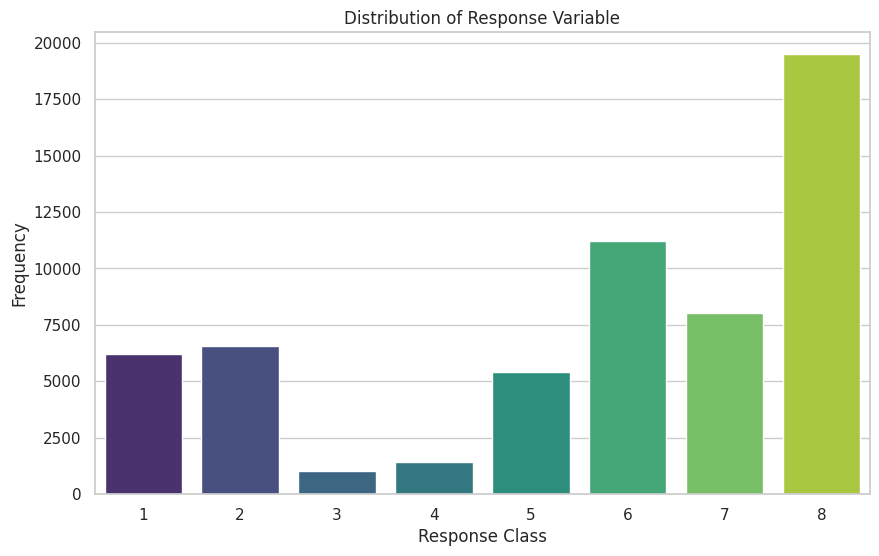

In [ ]:
# Set up the visualization settings
sns.set(style="whitegrid")

# Plotting the distribution of the Response variable
plt.figure(figsize=(10, 6))
sns.countplot(x=data['Response'], palette="viridis")
plt.title('Distribution of Response Variable')
plt.xlabel('Response Class')
plt.ylabel('Frequency')
plt.show()

*   The target variable has 8 classes, with a distribution skewed towards certain classes. Class 8 is the most common (32.82%), followed by classes 6, 7, and 2. Classes 3 and 4 are the least represented.
*   This imbalance in the target variable may affect model training and performance, necessitating strategies like oversampling, undersampling, or advanced algorithms to handle imbalanced data.

In [ ]:
data['Response_grp_num'] = data['Response'].apply(lambda x: 0 if 1 <= x <= 5 else (1 if 6 <= x <= 7 else 2))

In [ ]:
#Dropping ID column as we already have index column
data.drop(columns=['Id','Response'],inplace=True)
data.shape

(59381, 127)

In [ ]:
data.dtypes

Product_Info_1          int64
Product_Info_2         object
Product_Info_3          int64
Product_Info_4        float64
Product_Info_5          int64
                       ...   
Medical_Keyword_45      int64
Medical_Keyword_46      int64
Medical_Keyword_47      int64
Medical_Keyword_48      int64
Response_grp_num        int64
Length: 127, dtype: object

In [ ]:
data.head()

,Product_Info_1,Product_Info_2,Product_Info_3,Product_Info_4,Product_Info_5,Product_Info_6,Product_Info_7,Ins_Age,Ht,Wt,...,Medical_Keyword_40,Medical_Keyword_41,Medical_Keyword_42,Medical_Keyword_43,Medical_Keyword_44,Medical_Keyword_45,Medical_Keyword_46,Medical_Keyword_47,Medical_Keyword_48,Response_grp_num
0,1,D3,10,0.076923,2,1,1,0.641791,0.581818,0.148536,...,0,0,0,0,0,0,0,0,0,2
1,1,A1,26,0.076923,2,3,1,0.059701,0.600000,0.131799,...,0,0,0,0,0,0,0,0,0,0
2,1,E1,26,0.076923,2,3,1,0.029851,0.745455,0.288703,...,0,0,0,0,0,0,0,0,0,2
3,1,D4,10,0.487179,2,3,1,0.164179,0.672727,0.205021,...,0,0,0,0,0,0,0,0,0,2
4,1,D2,26,0.230769,2,3,1,0.417910,0.654545,0.234310,...,0,0,0,0,0,0,0,0,0,2


In [ ]:
X = data.drop(['Response_grp_num'], axis=1)
y = data['Response_grp_num']

In [ ]:
# Train-test split
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(X,y,test_size = 0.25, random_state=1)

In [ ]:
# Check the shape of train dataset
print(X_train.shape,Y_train.shape)

# Check the shape of test dataset
print(X_test.shape, Y_test.shape)

(44535, 126) (44535,)
(14846, 126) (14846,)


In [ ]:
numerical_cols=['Product_Info_4',' Ins_Age',' Ht',' Wt',' BMI',' Employment_Info_1',' Employment_Info_4',' Employment_Info_6',' Insurance_History_5',' Family_Hist_2',' Family_Hist_3',' Family_Hist_4',' Family_Hist_5','Medical_History_1',' Medical_History_10',' Medical_History_15',' Medical_History_24',' Medical_History_32']

categorical_cols=['Product_Info_1',' Product_Info_2',' Product_Info_3',' Product_Info_5',' Product_Info_6',' Product_Info_7',' Employment_Info_2',' Employment_Info_3',' Employment_Info_5',' InsuredInfo_1',' InsuredInfo_2',' InsuredInfo_3',' InsuredInfo_4',' InsuredInfo_5',' InsuredInfo_6',' InsuredInfo_7',' Insurance_History_1',' Insurance_History_2',' Insurance_History_3',' Insurance_History_4',' Insurance_History_7',' Insurance_History_8',' Insurance_History_9',' Family_Hist_1',' Medical_History_2',' Medical_History_3',' Medical_History_4',' Medical_History_5',' Medical_History_6',' Medical_History_7',' Medical_History_8',' Medical_History_9',' Medical_History_11',' Medical_History_12',' Medical_History_13',' Medical_History_14',' Medical_History_16',' Medical_History_17',' Medical_History_18',' Medical_History_19',' Medical_History_20',' Medical_History_21',' Medical_History_22',' Medical_History_23',' Medical_History_25',' Medical_History_26',' Medical_History_27',' Medical_History_28',' Medical_History_29',' Medical_History_30',' Medical_History_31',' Medical_History_33',' Medical_History_34',' Medical_History_35',' Medical_History_36',' Medical_History_37',' Medical_History_38',' Medical_History_39',' Medical_History_40',' Medical_History_41','Medical_Keyword_1','Medical_Keyword_2','Medical_Keyword_3','Medical_Keyword_4','Medical_Keyword_5','Medical_Keyword_6','Medical_Keyword_7','Medical_Keyword_8','Medical_Keyword_9','Medical_Keyword_10','Medical_Keyword_11','Medical_Keyword_12','Medical_Keyword_13','Medical_Keyword_14','Medical_Keyword_15','Medical_Keyword_16', 'Medical_Keyword_17','Medical_Keyword_18','Medical_Keyword_19','Medical_Keyword_20','Medical_Keyword_21','Medical_Keyword_22','Medical_Keyword_23','Medical_Keyword_24','Medical_Keyword_25','Medical_Keyword_26','Medical_Keyword_27','Medical_Keyword_28','Medical_Keyword_29','Medical_Keyword_30','Medical_Keyword_31','Medical_Keyword_32','Medical_Keyword_33','Medical_Keyword_34','Medical_Keyword_35','Medical_Keyword_36','Medical_Keyword_37','Medical_Keyword_38','Medical_Keyword_39','Medical_Keyword_40','Medical_Keyword_41','Medical_Keyword_42','Medical_Keyword_43','Medical_Keyword_44','Medical_Keyword_45','Medical_Keyword_46','Medical_Keyword_47','Medical_Keyword_48']

In [ ]:
# Number of missing values by column
missing_values_train = X_train.isnull().sum()
missing_values_test = X_test.isnull().sum()

print("missing values of train data:")
print(missing_values_train[missing_values_train > 0].sort_values(ascending=False))
print("\nmissing values of test data:")
print(missing_values_test[missing_values_test > 0].sort_values(ascending=False))

missing values of train data:
Medical_History_10     44116
Medical_History_32     43681
Medical_History_24     41643
Medical_History_15     33481
Family_Hist_5          31392
Family_Hist_3          25692
Family_Hist_2          21458
Insurance_History_5    19088
Family_Hist_4          14336
Employment_Info_6       8210
Medical_History_1       6714
Employment_Info_4       5086
Employment_Info_1         18
dtype: int64

missing values of test data:
Medical_History_10     14708
Medical_History_32     14593
Medical_History_24     13937
Medical_History_15     11115
Family_Hist_5          10419
Family_Hist_3           8549
Family_Hist_2           7198
Insurance_History_5     6308
Family_Hist_4           4848
Employment_Info_6       2644
Medical_History_1       2175
Employment_Info_4       1693
Employment_Info_1          1
dtype: int64


*   Significant missing values in features like Medical_History_10, Medical_History_32, Medical_History_24, Medical_History_15, Family_Hist_5, and others. Some features have over 50% data missing, which requires careful handling.
*   Employment_Info_1, Employment_Info_4, and Employment_Info_6 also have missing values but to a lesser extent.



(array([  0.5,   3.5,   6.5,   9.5,  12.5,  15.5,  18.5,  21.5,  24.5,
         27.5,  30.5,  33.5,  36.5,  39.5,  42.5,  45.5,  48.5,  51.5,
         54.5,  57.5,  60.5,  63.5,  66.5,  69.5,  72.5,  75.5,  78.5,
         81.5,  84.5,  87.5,  90.5,  93.5,  96.5,  99.5, 102.5, 105.5,
        108.5, 111.5, 114.5, 117.5, 120.5, 123.5]),
 [Text(0.5, 0, 'Product_Info_1'),
  Text(3.5, 0, 'Product_Info_4'),
  Text(6.5, 0, 'Product_Info_7'),
  Text(9.5, 0, 'Wt'),
  Text(12.5, 0, 'Employment_Info_2'),
  Text(15.5, 0, 'Employment_Info_5'),
  Text(18.5, 0, 'InsuredInfo_2'),
  Text(21.5, 0, 'InsuredInfo_5'),
  Text(24.5, 0, 'Insurance_History_1'),
  Text(27.5, 0, 'Insurance_History_4'),
  Text(30.5, 0, 'Insurance_History_8'),
  Text(33.5, 0, 'Family_Hist_2'),
  Text(36.5, 0, 'Family_Hist_5'),
  Text(39.5, 0, 'Medical_History_3'),
  Text(42.5, 0, 'Medical_History_6'),
  Text(45.5, 0, 'Medical_History_9'),
  Text(48.5, 0, 'Medical_History_12'),
  Text(51.5, 0, 'Medical_History_15'),
  Text(54.5, 0, 

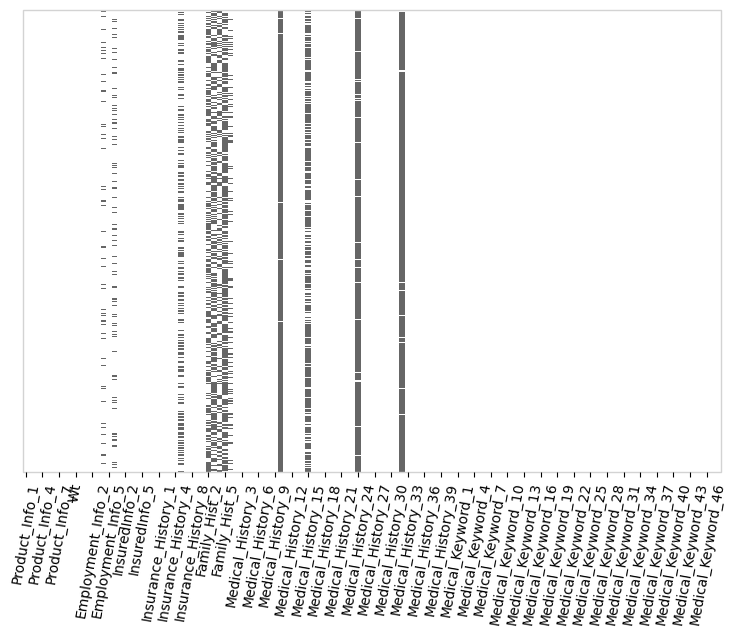

In [ ]:
# given a dataframe df create a copy of the array that is 0 if a field contains a
# value and 1 for NaN
naInfo = np.zeros(X_train.shape)
naInfo[X_train.isna().values] = 1
naInfo = pd.DataFrame(naInfo, columns=X_train.columns)

fig, ax = plt.subplots()
fig.set_size_inches(9, 6)
ax = sns.heatmap(naInfo, vmin=0, vmax=1, cmap=["white", "#666666"], cbar=False, ax=ax)
ax.set_yticks([])

# draw frame around figure
rect = plt.Rectangle((0, 0), naInfo.shape[1], naInfo.shape[0], linewidth=1,
edgecolor='lightgrey', facecolor='none')
rect = ax.add_patch(rect)
rect.set_clip_on(False)
plt.xticks(rotation=80)

                feature  missing_values  missing_percentage       Type
0     Employment_Info_1              18            0.030313  Numerical
1     Employment_Info_4            5086            8.565029  Numerical
2     Employment_Info_6            8210           13.825971  Numerical
3   Insurance_History_5           19088           32.144962  Numerical
4         Family_Hist_2           21458           36.136138  Numerical
5         Family_Hist_3           25692           43.266365  Numerical
6         Family_Hist_4           14336           24.142402  Numerical
7         Family_Hist_5           31392           52.865395  Numerical
8     Medical_History_1            6714           11.306647  Numerical
9    Medical_History_10           44116           74.293124  Numerical
10   Medical_History_15           33481           56.383355  Numerical
11   Medical_History_24           41643           70.128492  Numerical
12   Medical_History_32           43681           73.560567  Numerical


<ipython-input-15-b89d37614399>:14: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(y='feature', x='missing_percentage', data=missing_values_df.sort_values(by='missing_percentage', ascending=False), palette="cubehelix")


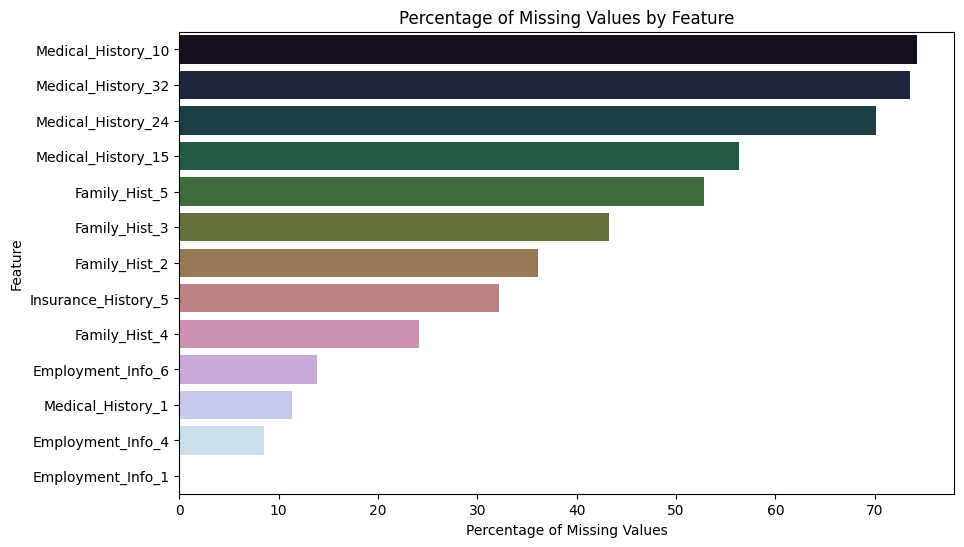

In [ ]:
# Visualizing the missing values
missing_values_df = pd.DataFrame(missing_values_train[missing_values_train > 0], columns=['missing_values']).reset_index()
missing_values_df.rename(columns={'index': 'feature'}, inplace=True)
missing_values_df['missing_percentage'] = (missing_values_df['missing_values'] / len(data)) * 100

for i in missing_values_df['feature']:
    if i in numerical_cols:
        missing_values_df['Type']='Numerical'
    elif i in categorical_cols:
        missing_values_df['Type']='Categorical'
print(missing_values_df)

plt.figure(figsize=(10, 6))
sns.barplot(y='feature', x='missing_percentage', data=missing_values_df.sort_values(by='missing_percentage', ascending=False), palette="cubehelix")
plt.title('Percentage of Missing Values by Feature')
plt.xlabel('Percentage of Missing Values')
plt.ylabel('Feature')
plt.show()

The visualization of missing values highlights several features with significant percentages of missing data. For instance, Medical_History_10 and Medical_History_32 have the highest percentages of missing values, exceeding 70% respectively. Such high levels of missing data present a challenge for data imputation and might necessitate the removal of some features for effective modeling.

In [ ]:
# Removing features with more than 50% missing values
columns_to_drop = missing_values_df[missing_values_df['missing_percentage'] > 50]['feature']
columns_to_impute=missing_values_df[missing_values_df['missing_percentage'] <= 50]['feature']
data_cleaned = X_train.drop(columns=columns_to_drop)
data_cleaned_test = X_test.drop(columns=columns_to_drop)
columns_to_impute

0      Employment_Info_1
1      Employment_Info_4
2      Employment_Info_6
3    Insurance_History_5
4          Family_Hist_2
5          Family_Hist_3
6          Family_Hist_4
8      Medical_History_1
Name: feature, dtype: object

In [ ]:
# Applying median imputation for the remaining missing numerical features
imputer = SimpleImputer(strategy='mean')

# Numerical columns for imputation
n_cols = data_cleaned.select_dtypes(include=['float64', 'int64']).columns
data_cleaned[n_cols] = imputer.fit_transform(data_cleaned[n_cols])
data_cleaned_test[n_cols] = imputer.transform(data_cleaned_test[n_cols])

# Check if there are any missing values left
missing_values_after_imputation = data_cleaned.isnull().sum().sort_values(ascending=False)
missing_values_after_imputation_test = data_cleaned_test.isnull().sum().sort_values(ascending=False)

print(missing_values_after_imputation[missing_values_after_imputation > 0])
print(missing_values_after_imputation_test[missing_values_after_imputation_test > 0])

Series([], dtype: int64)
Series([], dtype: int64)


In [ ]:
print(data_cleaned.select_dtypes(include='object').columns)
print(data_cleaned_test.select_dtypes(include='object').columns)

Index(['Product_Info_2'], dtype='object')
Index(['Product_Info_2'], dtype='object')


In [ ]:
#Converting the Product_Info_2 to Numerical Column using label encoding
# Import label encoder
from sklearn import preprocessing

label_encoder = preprocessing.LabelEncoder()

# Encode labels in column 'Product_Info_2'.
data_cleaned['Product_Info_2']= label_encoder.fit_transform(data_cleaned['Product_Info_2'])
data_cleaned_test['Product_Info_2']= label_encoder.transform(data_cleaned_test['Product_Info_2'])

print(data_cleaned['Product_Info_2'].unique())
print(data_cleaned_test['Product_Info_2'].unique())

[10  6 17  1 16  4  0  5  7 18 14 15  9 13  2  3  8 12 11]
[16  6 15  5  7  2 18  9 14 17 12 10  0  1 11 13  3  4  8]


In [ ]:
print(data_cleaned.select_dtypes(include='object').columns)
print(data_cleaned_test.select_dtypes(include='object').columns)

Index([], dtype='object')
Index([], dtype='object')


In [ ]:
# Checking the max and min values of all the numerical features

data_cleaned[['Ins_Age', 'Ht', 'Wt', 'BMI', 'Employment_Info_1', 'Employment_Info_4', 'Employment_Info_6', 'Insurance_History_5',
'Family_Hist_2' , 'Family_Hist_4', 'Medical_History_1']].describe()


,Ins_Age,Ht,Wt,BMI,Employment_Info_1,Employment_Info_4,Employment_Info_6,Insurance_History_5,Family_Hist_2,Family_Hist_4,Medical_History_1
count,44535.000000,44535.000000,44535.000000,44535.000000,44535.000000,44535.000000,44535.000000,44535.000000,44535.000000,44535.000000,44535.000000
mean,0.405559,0.707281,0.292332,0.469000,0.077430,0.006114,0.362272,0.001757,0.474733,0.445238,7.961238
std,0.197235,0.074166,0.088988,0.122138,0.081814,0.029320,0.315667,0.006327,0.111886,0.134396,11.997651
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.238806,0.654545,0.225941,0.385344,0.035000,0.000000,0.100000,0.000667,0.449275,0.380282,2.000000
50%,0.402985,0.709091,0.288703,0.449828,0.060000,0.000000,0.350000,0.001757,0.474733,0.445238,6.000000
75%,0.567164,0.763636,0.345188,0.532772,0.099000,0.000000,0.500000,0.001757,0.474733,0.492958,8.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.943662,240.000000


From the above table we can conclude that Medical History 1 column is having values from [0,240]. Normalizing this usuing min-max scaler

In [ ]:
data_cleaned_test['Medical_History_1'].describe()

count    14846.000000
mean         7.964414
std         12.059671
min          0.000000
25%          2.000000
50%          5.000000
75%          8.000000
max        240.000000
Name: Medical_History_1, dtype: float64

In [ ]:
from sklearn.preprocessing import MinMaxScaler

# Initialize the MinMaxScaler
scaler = MinMaxScaler()

# Reshape the 'Medical_History_1' for scaling
medical_history_1 = data_cleaned['Medical_History_1'].values.reshape(-1, 1)
medical_history_test=data_cleaned_test['Medical_History_1'].values.reshape(-1, 1)

# Normalize 'Medical_History_1'
data_cleaned['Medical_History_1'] = scaler.fit_transform(medical_history_1)
data_cleaned_test['Medical_History_1']=scaler.transform(medical_history_test)

data_cleaned[['Ins_Age', 'Ht', 'Wt', 'BMI', 'Employment_Info_1', 'Employment_Info_4', 'Employment_Info_6', 'Insurance_History_5',
'Family_Hist_2' , 'Family_Hist_4', 'Medical_History_1']].describe()

,Ins_Age,Ht,Wt,BMI,Employment_Info_1,Employment_Info_4,Employment_Info_6,Insurance_History_5,Family_Hist_2,Family_Hist_4,Medical_History_1
count,44535.000000,44535.000000,44535.000000,44535.000000,44535.000000,44535.000000,44535.000000,44535.000000,44535.000000,44535.000000,44535.000000
mean,0.405559,0.707281,0.292332,0.469000,0.077430,0.006114,0.362272,0.001757,0.474733,0.445238,0.033172
std,0.197235,0.074166,0.088988,0.122138,0.081814,0.029320,0.315667,0.006327,0.111886,0.134396,0.049990
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.238806,0.654545,0.225941,0.385344,0.035000,0.000000,0.100000,0.000667,0.449275,0.380282,0.008333
50%,0.402985,0.709091,0.288703,0.449828,0.060000,0.000000,0.350000,0.001757,0.474733,0.445238,0.025000
75%,0.567164,0.763636,0.345188,0.532772,0.099000,0.000000,0.500000,0.001757,0.474733,0.492958,0.033333
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.943662,1.000000


In [ ]:
data_cleaned_test['Medical_History_1'].describe()

count    14846.000000
mean         0.033185
std          0.050249
min          0.000000
25%          0.008333
50%          0.020833
75%          0.033333
max          1.000000
Name: Medical_History_1, dtype: float64

In [ ]:
# Identifying outliers using IQR method for key numerical features
key_numerical_features = ['Ins_Age', 'Ht', 'Wt', 'BMI', 'Employment_Info_1', 'Employment_Info_4', 'Employment_Info_6', 'Insurance_History_5',
'Family_Hist_2' , 'Family_Hist_4', 'Medical_History_1']

outliers_info = {}

for feature in key_numerical_features:
    Q1 = data_cleaned[feature].quantile(0.25)
    Q3 = data_cleaned[feature].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR

    outliers_count = data_cleaned.loc[(data_cleaned[feature] < lower_bound) | (data_cleaned[feature] > upper_bound), feature].count()
    outliers_info[feature] = {'lower_bound': lower_bound, 'upper_bound': upper_bound, 'outliers_count': outliers_count}

# Converting outliers information to a DataFrame for better visualization
outliers_df = pd.DataFrame(outliers_info).transpose()
outliers_df


,lower_bound,upper_bound,outliers_count
Ins_Age,-0.253731,1.059701,0.0
Ht,0.490909,0.927273,53.0
Wt,0.047071,0.524059,616.0
BMI,0.164202,0.753913,1198.0
Employment_Info_1,-0.061000,0.195000,2627.0
Employment_Info_4,0.000000,0.000000,11015.0
Employment_Info_6,-0.500000,1.100000,0.0
Insurance_History_5,-0.000969,0.003393,2369.0
Family_Hist_2,0.411089,0.512919,17368.0
Family_Hist_4,0.211268,0.661972,5915.0


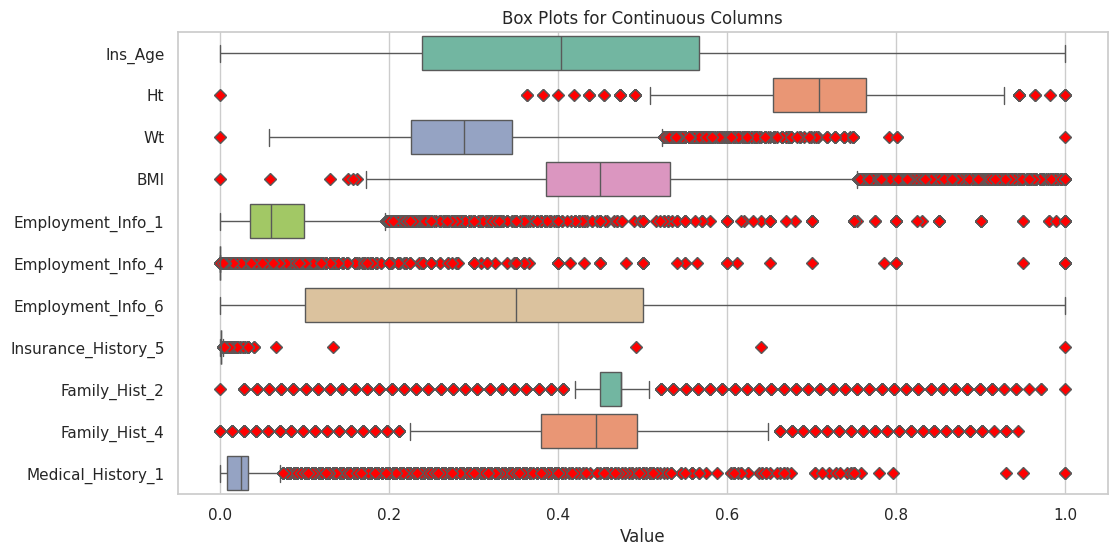

In [ ]:
# Create box plots for each column
plt.figure(figsize=(12, 6))
sns.boxplot(data=data_cleaned[key_numerical_features], orient="h", palette="Set2",
            flierprops=dict(markerfacecolor='red', marker='D'))
plt.title("Box Plots for Continuous Columns")
plt.xlabel("Value")
plt.show()

Since all the numerical columns are normalized, outliers can be considered as values that are unusually low (close to 0) or high (close to 1) compared to the majority of the data. Therefore applying capping and flooring method to the specified columns which involves calculating the 1st and 99th percentiles for each column and then applying the bounds.

In [ ]:
# Calculate the 1st and 99th percentiles for the numerical columns
percentiles = data_cleaned[key_numerical_features].quantile([0.01, 0.99])

for col in key_numerical_features:
    # Apply capping and flooring for each column
    data_cleaned[col] = data_cleaned[col].clip(lower=percentiles.loc[0.01, col], upper=percentiles.loc[0.99, col])

# Check the min and max values again to confirm the adjustment
min_max_values_after_outlier_handling = data_cleaned[key_numerical_features].agg(['min', 'max']).transpose()

min_max_values_after_outlier_handling


,min,max
Ins_Age,0.029851,0.805970
Ht,0.545455,0.854545
Wt,0.131799,0.539749
BMI,0.257087,0.854614
Employment_Info_1,0.000000,0.400000
Employment_Info_4,0.000000,0.100000
Employment_Info_6,0.000000,1.000000
Insurance_History_5,0.000033,0.006667
Family_Hist_2,0.188406,0.797101
Family_Hist_4,0.126761,0.788732


## Target Variable Analysis

In [ ]:
# Calculate the correlation of numeric features with the original 'Response' variable
correlation_with_response = data_cleaned[key_numerical_features].corrwith(Y_train)

# Sort the correlations to identify the strongest relationships
correlation_with_response_sorted = correlation_with_response.sort_values(key=abs, ascending=False)

correlation_with_response_matrix=pd.DataFrame({'corr':correlation_with_response_sorted})

correlation_with_response_matrix

,corr
BMI,-0.467042
Wt,-0.428044
Ins_Age,-0.203175
Ht,-0.117107
Medical_History_1,0.103114
Insurance_History_5,0.099610
Family_Hist_4,-0.072596
Employment_Info_1,0.045784
Family_Hist_2,-0.043278
Employment_Info_6,0.027271


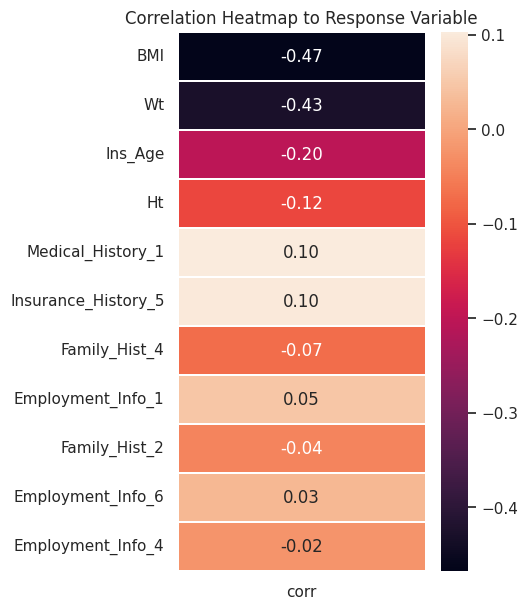

In [ ]:
# Create a heatmap of the Top 50 variables absolute correlation matrix.
plt.figure(figsize=(4, 7))
sns.heatmap(data = correlation_with_response_matrix, annot=True, fmt= '.2f', linewidths=0.1, linecolor= 'white')
plt.title("Correlation Heatmap to Response Variable")
plt.show()

The correlation analysis with the original Response variable highlights several features with notable linear relationships, either positive or negative. Here are the top features with the strongest correlations:

- BMI (Body Mass Index): Correlation of -0.381, indicating a moderate negative relationship. As BMI increases, the risk category tends to be lower.
- Wt (Weight): Correlation of -0.350, similar to BMI, showing a moderate negative relationship with the risk category.
- Medical_History_23: Correlation of 0.287, indicating a moderate positive relationship. Presence or specifics of medical history 23 are associated with higher risk categories.
- Medical_Keyword_15: Correlation of -0.259, showing a moderate negative relationship with the risk category.

These correlations suggest that certain health-related features (like BMI and weight) and specific medical history details are influential in determining the risk category. Notably, both BMI and weight negatively correlate with risk, suggesting that higher values are associated with lower risk categories, potentially reflecting underwriting criteria related to health and lifestyle factors.

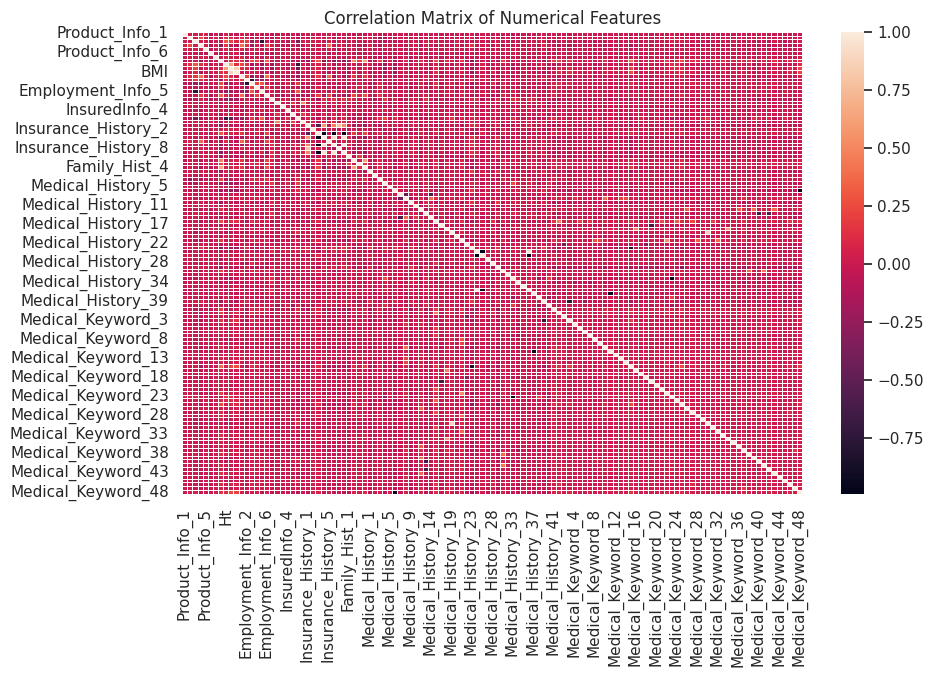

In [ ]:
#X = data_cleaned.drop(['Response','Response_group','Response_grp_num'], axis=1)

#y = data_cleaned['Response_grp_num']

# Compute the correlation matrix for numerical features
corr_matrix = data_cleaned.select_dtypes(include=['float64', 'int64']).corr()

# Use a heatmap to visualize the correlation matrix
plt.figure(figsize=(10, 6))
sns.heatmap(corr_matrix, annot=False, fmt=".2f", linewidths=.5)
plt.title('Correlation Matrix of Numerical Features')
plt.show()

In [ ]:
corr_greater_than_90 = corr_matrix[corr_matrix>=.9]
corr_greater_than_90

,Product_Info_1,Product_Info_2,Product_Info_3,Product_Info_4,Product_Info_5,Product_Info_6,Product_Info_7,Ins_Age,Ht,Wt,...,Medical_Keyword_39,Medical_Keyword_40,Medical_Keyword_41,Medical_Keyword_42,Medical_Keyword_43,Medical_Keyword_44,Medical_Keyword_45,Medical_Keyword_46,Medical_Keyword_47,Medical_Keyword_48
Product_Info_1,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Product_Info_2,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Product_Info_3,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Product_Info_4,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Product_Info_5,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
Medical_Keyword_44,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN
Medical_Keyword_45,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN
Medical_Keyword_46,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN
Medical_Keyword_47,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN


<function matplotlib.pyplot.show(close=None, block=None)>

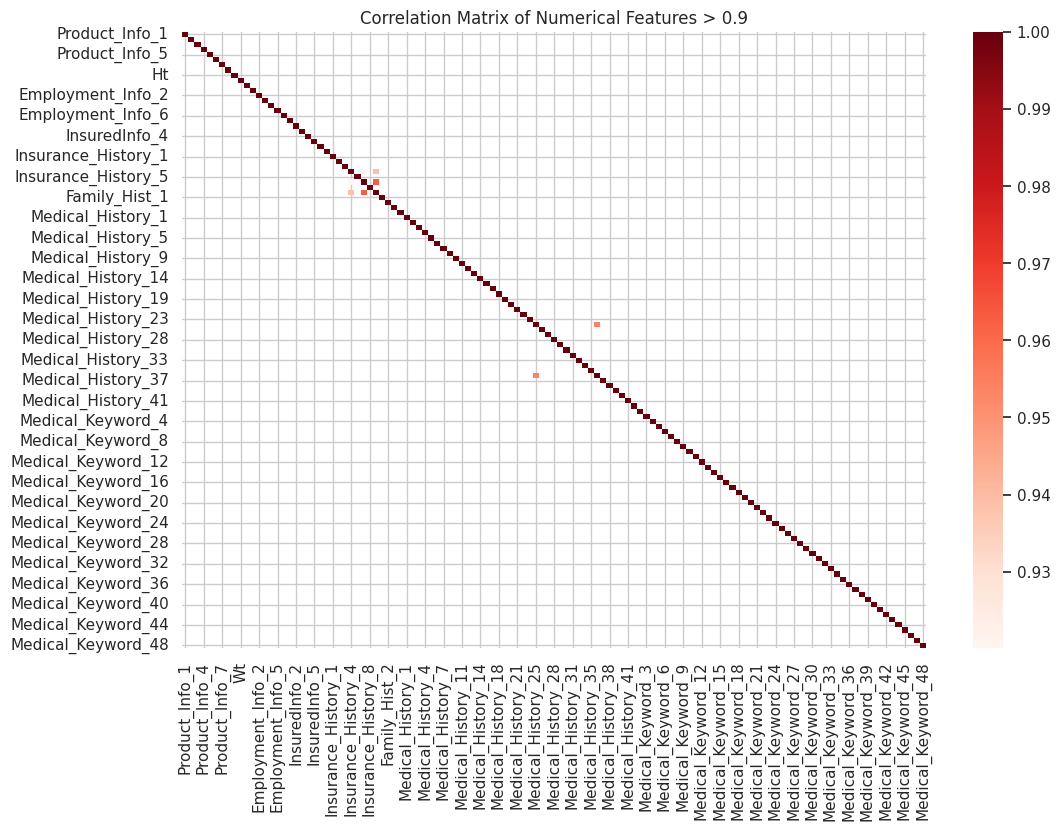

In [ ]:
plt.figure(figsize=(12,8))
sns.heatmap(corr_greater_than_90, cmap="Reds")
plt.title('Correlation Matrix of Numerical Features > 0.9')
plt.show

In [ ]:
# Initialize an empty set to keep track of columns to drop
redundant_columns = set()

# Iterate over the correlation matrix
for i in range(len(corr_matrix.columns)):
    for j in range(i):
        if abs(corr_matrix.iloc[i, j]) > 0.9:
            # If correlation is above threshold, add one of the variables to the set
            colname = corr_matrix.columns[i]
            redundant_columns.add(colname)

# Drop identified columns
data_2 = data_cleaned.drop(columns=redundant_columns)
data_2_test = data_cleaned_test.drop(columns=redundant_columns)

## Performing PCA

In [ ]:
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
import numpy as np

# Exclude non-numeric columns and target variable for PCA
#features = data_cleaned.select_dtypes(include=[np.number]).drop(columns=['Response', 'Response_Categorized'])

# Standardize the features
scaler = StandardScaler()
features_standardized = scaler.fit_transform(data_2)
test_featuers_standardized=scaler.transform(data_2_test)

# Apply PCA
pca = PCA(n_components=0.95)  # Retain 95% of the variance
principal_components = pca.fit_transform(features_standardized)
principal_components_test = pca.transform(test_featuers_standardized)

# Number of components chosen
num_components_chosen = pca.n_components_

pcSummary=pd.DataFrame({
    'Standard deviation': np.sqrt(pca.explained_variance_),
    'Proportion of variance': pca.explained_variance_ratio_,
    'Cumulative proportion': np.cumsum(pca.explained_variance_ratio_)
})

pcSummary=pcSummary.transpose()
pcSummary.columns=['PC'+str(i) for i in range(1,93)]
pcSummary

,PC1,PC2,PC3,PC4,PC5,PC6,PC7,PC8,PC9,PC10,...,PC83,PC84,PC85,PC86,PC87,PC88,PC89,PC90,PC91,PC92
Standard deviation,2.270938,1.949738,1.639312,1.551554,1.433587,1.386707,1.341747,1.325708,1.318937,1.303839,...,0.865012,0.861610,0.851622,0.832843,0.830072,0.811849,0.778053,0.733604,0.729688,0.690496
Proportion of variance,0.045638,0.033641,0.023781,0.021303,0.018187,0.017017,0.015931,0.015553,0.015394,0.015044,...,0.006621,0.006570,0.006418,0.006138,0.006097,0.005833,0.005357,0.004762,0.004712,0.004219
Cumulative proportion,0.045638,0.079278,0.103059,0.124363,0.142550,0.159567,0.175498,0.191051,0.206445,0.221489,...,0.902686,0.909256,0.915674,0.921812,0.927909,0.933742,0.939099,0.943861,0.948573,0.952792


In [ ]:
pcsComponents_df = pd.DataFrame(pca.components_.transpose(), columns=['PC'+str(i) for i in range(1,93)],index=data_2.columns)
pcsComponents_df

,PC1,PC2,PC3,PC4,PC5,PC6,PC7,PC8,PC9,PC10,...,PC83,PC84,PC85,PC86,PC87,PC88,PC89,PC90,PC91,PC92
Product_Info_1,-0.021299,-0.041131,0.031681,0.079887,0.018574,-0.001601,-0.042768,-0.008241,0.051261,-0.042327,...,-0.054576,-0.106370,0.010159,0.060981,-0.004845,0.026943,0.015678,-0.005417,-0.013095,0.004889
Product_Info_2,-0.008148,-0.112588,0.057751,0.121476,0.049749,0.044917,0.035538,-0.154816,0.024307,-0.174704,...,0.024452,0.077424,0.042497,-0.229035,-0.250068,0.426923,0.071942,-0.170969,-0.322592,-0.003450
Product_Info_3,-0.003405,-0.299776,0.042291,-0.022409,-0.069927,0.060194,0.026014,0.171133,-0.049972,0.175900,...,0.000618,-0.018725,-0.007779,-0.039400,-0.024766,0.009733,0.002960,-0.015347,-0.015936,-0.005662
Product_Info_4,-0.112834,-0.151732,-0.095593,0.261072,-0.006012,0.144100,-0.121210,-0.172378,0.092376,-0.176189,...,0.054433,-0.001405,0.004177,-0.045869,-0.002228,0.293229,0.037926,0.259377,0.575347,-0.014785
Product_Info_5,0.004029,-0.046967,-0.023850,0.048176,0.015185,0.012986,-0.043376,-0.007619,0.026892,-0.050451,...,-0.026138,0.014396,-0.007006,0.004230,0.011233,0.059333,-0.019727,0.011313,0.010693,-0.000949
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
Medical_Keyword_43,0.080370,-0.025371,-0.008979,0.023249,-0.016551,-0.058320,-0.106450,0.100383,0.027213,-0.055679,...,-0.040113,-0.010820,-0.096522,-0.081850,-0.034424,0.018123,0.013272,0.024460,0.036654,-0.014384
Medical_Keyword_44,0.027268,-0.001802,0.017819,0.029639,-0.028710,-0.009210,-0.012489,-0.006090,-0.004976,0.020499,...,-0.033550,-0.007419,-0.032663,-0.011107,-0.025270,-0.012661,-0.006263,-0.053205,0.013167,-0.001451
Medical_Keyword_45,0.035350,0.054168,-0.011256,0.005488,-0.006449,0.085757,0.003463,-0.076438,-0.033586,0.020183,...,0.060591,-0.027306,0.000769,0.056495,0.073416,0.008819,-0.020927,-0.067848,0.009156,0.011187
Medical_Keyword_46,0.082769,0.007916,0.035391,-0.037898,-0.007636,-0.021376,-0.030091,0.043540,0.042545,-0.067026,...,-0.028028,-0.134438,0.281525,0.031008,-0.044677,-0.001318,0.021796,0.016808,0.010109,-0.005908


In [ ]:
pca_transformed=pd.DataFrame(principal_components,columns=['PC'+str(i) for i in range(1,93)])
pca_transformed_test=pd.DataFrame(principal_components_test,columns=['PC'+str(i) for i in range(1,93)])

# Hyperparameters

In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV

def grid_search(model, parameters, X_train, Y_train):
  #Doing a grid
  grid = GridSearchCV(estimator=model,
                       param_grid = parameters,
                       cv = 2, verbose=2, scoring='roc_auc_ovo')
  #Fitting the grid
  grid.fit(X_train,Y_train)

  # Best model found using grid search
  optimal_model = grid.best_estimator_


  print('Best parameters are: ')

  print( grid.best_params_)


  return optimal_model

In [ ]:
# Getting scores from all the metrices
from sklearn.metrics import log_loss
from sklearn.metrics import accuracy_score,roc_auc_score,confusion_matrix
from sklearn.metrics import accuracy_score, f1_score, precision_score, recall_score, classification_report, confusion_matrix,r2_score

## Random Forest

**With PCA**

The accuracy on train dataset is 0.7039631750308746
The accuracy on test dataset is 0.5992860029637613

Train confusion matrix:
[[11347  2110  1957]
 [ 3461  8196  2836]
 [ 1228  1592 11808]]


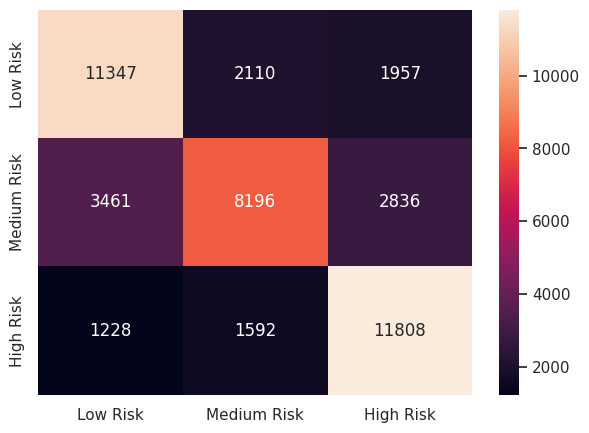


Test confusion matrix:
[[3418 1037  763]
 [1612 1969 1186]
 [ 593  758 3510]]


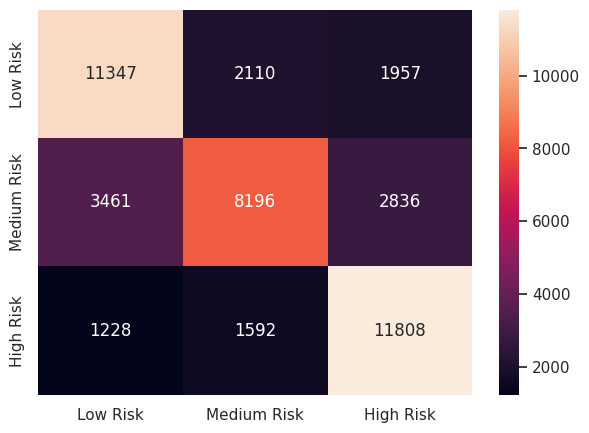


ROC on train data: 0.8692125734158439
ROC on test data: 0.7854613123687718
F score is: 0.5925783328410394
Precision is: 0.5921460680004672
Recall is: 0.5992860029637613


In [ ]:
from sklearn.ensemble import RandomForestClassifier
random_forest_model_pca=RandomForestClassifier(n_estimators= 200,max_depth= 15,min_samples_leaf= 40,min_samples_split= 50,criterion='gini',random_state=42)

random_forest_model_pca.fit(pca_transformed,Y_train)

train_class_preds_rf_pca = random_forest_model_pca.predict(pca_transformed)
test_class_preds_rf_pca = random_forest_model_pca.predict(pca_transformed_test)

## Get the probabilities on train and test
train_preds_rf_pca = random_forest_model_pca.predict_proba(pca_transformed)
test_preds_rf_pca = random_forest_model_pca.predict_proba(pca_transformed_test)

# Calculating accuracy on train and test
train_accuracy_rf_pca = accuracy_score(Y_train,train_class_preds_rf_pca)
test_accuracy_rf_pca = accuracy_score(Y_test,test_class_preds_rf_pca)

print("The accuracy on train dataset is", train_accuracy_rf_pca)
print("The accuracy on test dataset is", test_accuracy_rf_pca)
print()

# Get the confusion matrices for train and test
train_cm_rf_pca = confusion_matrix(Y_train,train_class_preds_rf_pca)
test_cm_rf_pca = confusion_matrix(Y_test,test_class_preds_rf_pca )

print('Train confusion matrix:')
print( train_cm_rf_pca)
plt.figure(figsize=(7,5))
sns.heatmap(train_cm_rf_pca,annot=True,fmt="d",xticklabels=["Low Risk","Medium Risk","High Risk"],yticklabels=["Low Risk","Medium Risk","High Risk"],linecolor="darkorange")
plt.show()
print()
print('Test confusion matrix:')
print(test_cm_rf_pca)
plt.figure(figsize=(7,5))
sns.heatmap(train_cm_rf_pca,annot=True,fmt="d",xticklabels=["Low Risk","Medium Risk","High Risk"],yticklabels=["Low Risk","Medium Risk","High Risk"],linecolor="darkorange")
plt.show()
print()

# Get the roc_auc score for train and test dataset
train_auc_rf_pca = roc_auc_score(Y_train,train_preds_rf_pca, multi_class='ovo')
test_auc_rf_pca = roc_auc_score(Y_test,test_preds_rf_pca, multi_class='ovo')

print('ROC on train data:', train_auc_rf_pca)
print('ROC on test data:', test_auc_rf_pca)

# Fscore, precision and recall on test data
f1_rf_pca = f1_score(Y_test, test_class_preds_rf_pca, average='weighted')
precision_rf_pca = precision_score(Y_test, test_class_preds_rf_pca, average='weighted')
recall_rf_pca = recall_score(Y_test, test_class_preds_rf_pca, average='weighted')

print("F score is:",f1_rf_pca )
print("Precision is:",precision_rf_pca)
print("Recall is:", recall_rf_pca)

**Without PCA**

The accuracy on train dataset is 0.6855282362187044
The accuracy on test dataset is 0.6635457362252458

Train confusion matrix:
[[ 9480  3415  2519]
 [ 2397  8531  3565]
 [  349  1760 12519]]


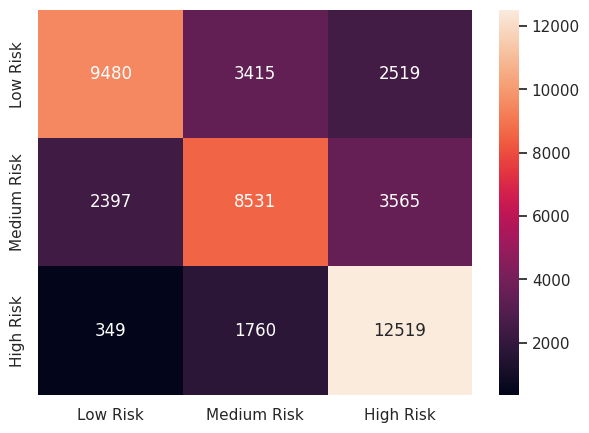


Test confusion matrix:
[[3107 1247  864]
 [ 902 2662 1203]
 [ 132  647 4082]]


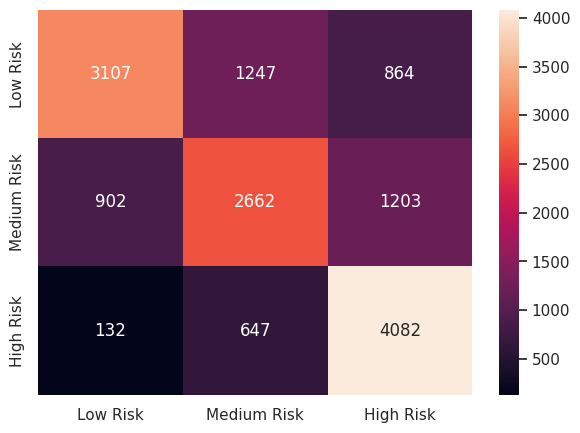


ROC on train data: 0.8555991722103197
ROC on test data: 0.8341280630502096
F score is: 0.6595216428682648
Precision is: 0.6686867292806106
Recall is: 0.6635457362252458


In [ ]:
from sklearn.ensemble import RandomForestClassifier
random_forest_model=RandomForestClassifier(n_estimators= 200,max_depth= 15,min_samples_leaf= 40,min_samples_split= 50,criterion='gini',random_state=42)


random_forest_model.fit(data_2,Y_train)

train_class_preds_rf = random_forest_model.predict(data_2)
test_class_preds_rf = random_forest_model.predict(data_2_test)

## Get the probabilities on train and test
train_preds_rf = random_forest_model.predict_proba(data_2)
test_preds_rf = random_forest_model.predict_proba(data_2_test)

# Calculating accuracy on train and test
train_accuracy_rf = accuracy_score(Y_train,train_class_preds_rf)
test_accuracy_rf = accuracy_score(Y_test,test_class_preds_rf)

print("The accuracy on train dataset is", train_accuracy_rf)
print("The accuracy on test dataset is", test_accuracy_rf)
print()

# Get the confusion matrices for train and test
train_cm_rf = confusion_matrix(Y_train,train_class_preds_rf)
test_cm_rf = confusion_matrix(Y_test,test_class_preds_rf )

print('Train confusion matrix:')
print( train_cm_rf)
plt.figure(figsize=(7,5))
sns.heatmap(train_cm_rf,annot=True,fmt="d",xticklabels=["Low Risk","Medium Risk","High Risk"],yticklabels=["Low Risk","Medium Risk","High Risk"],linecolor="darkorange")
plt.show()
print()
print('Test confusion matrix:')
print(test_cm_rf)
plt.figure(figsize=(7,5))
sns.heatmap(test_cm_rf,annot=True,fmt="d",xticklabels=["Low Risk","Medium Risk","High Risk"],yticklabels=["Low Risk","Medium Risk","High Risk"],linecolor="darkorange")
plt.show()
print()

# Get the roc_auc score for train and test dataset
train_auc_rf = roc_auc_score(Y_train,train_preds_rf, multi_class='ovo')
test_auc_rf = roc_auc_score(Y_test,test_preds_rf, multi_class='ovo')

print('ROC on train data:', train_auc_rf)
print('ROC on test data:', test_auc_rf)

# Fscore, precision and recall on test data
f1_rf = f1_score(Y_test, test_class_preds_rf, average='weighted')
precision_rf = precision_score(Y_test, test_class_preds_rf, average='weighted')
recall_rf = recall_score(Y_test, test_class_preds_rf, average='weighted')

print("F score is:",f1_rf )
print("Precision is:",precision_rf)
print("Recall is:", recall_rf)

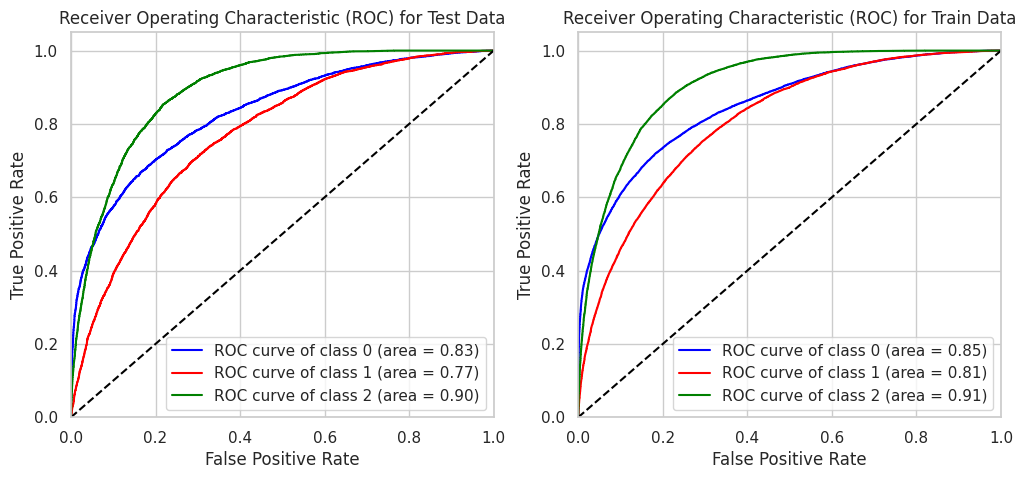

In [ ]:
from sklearn.metrics import roc_curve, auc

test_fpr_rf = dict()
test_tpr_rf = dict()
test_roc_auc_rf = dict()

train_fpr_rf = dict()
train_tpr_rf = dict()
train_roc_auc_rf = dict()

test_n_classes_rf = 3  # Number of classes
train_n_classes_rf = 3  # Number of classes

for i in range(test_n_classes_rf):
    test_fpr_rf[i], test_tpr_rf[i], _ = roc_curve(Y_test,test_preds_rf[:, i], pos_label=i)
    test_roc_auc_rf[i] = auc(test_fpr_rf[i], test_tpr_rf[i])

for i in range(train_n_classes_rf):
    train_fpr_rf[i], train_tpr_rf[i], _ = roc_curve(Y_train,train_preds_rf[:, i], pos_label=i)
    train_roc_auc_rf[i] = auc(train_fpr_rf[i], train_tpr_rf[i])


plt.figure(figsize=(12,5))
plt.subplot(1, 2, 1)
colors = ['blue', 'red', 'green']
for i, color in zip(range(test_n_classes_rf), colors):
    plt.plot(test_fpr_rf[i], test_tpr_rf[i], color=color,label='ROC curve of class {0} (area = {1:0.2f})'.format(i, test_roc_auc_rf[i]))
plt.plot([0, 1], [0, 1], color='black', linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) for Test Data')
plt.legend()

plt.subplot(1, 2, 2)
colors = ['blue', 'red', 'green']
for i, color in zip(range(train_n_classes_rf), colors):
    plt.plot(train_fpr_rf[i], train_tpr_rf[i], color=color,label='ROC curve of class {0} (area = {1:0.2f})'.format(i, train_roc_auc_rf[i]))
plt.plot([0, 1], [0, 1], color='black', linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) for Train Data')
plt.legend()

plt.show()

In [ ]:
from sklearn.metrics import roc_curve, auc
from sklearn.preprocessing import label_binarize
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.multiclass import OneVsRestClassifier
import matplotlib.pyplot as plt

## XG Boosting

In [ ]:
#pip install xgboost

**With PCA**

The accuracy on train dataset is 0.9939598068934545
The accuracy on test dataset is 0.6097938838744443

Train confusion matrix:
[[15203    75   136]
 [    1 14441    51]
 [    1     5 14622]]


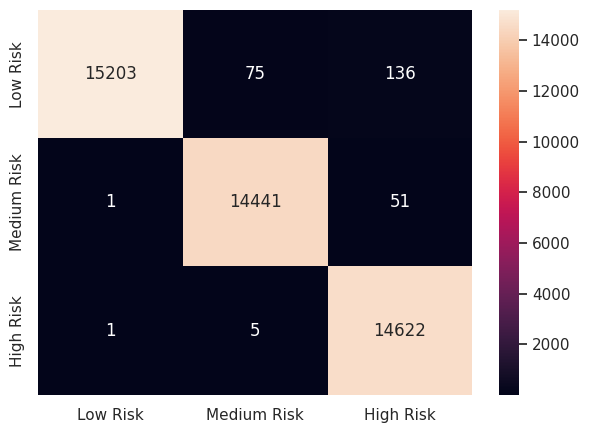


Test confusion matrix:
[[3158 1247  813]
 [1326 2288 1153]
 [ 404  850 3607]]


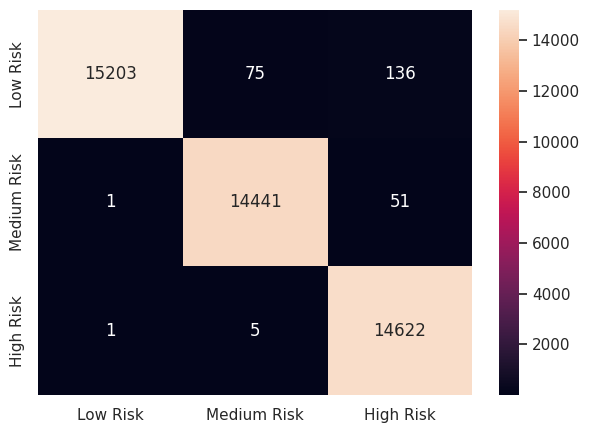


ROC on train data: 0.9999576815902703
ROC on test data: 0.7902271101038089
F score is: 0.6065933466742575
Precision is: 0.6065402894143835
Recall is: 0.6097938838744443


In [ ]:
# Parameter grid for xgboost
from xgboost import XGBClassifier
xgb_model_pca=XGBClassifier(max_depth=15, n_estimators= 200, learning_rate=0.01,random_state=42)

xgb_model_pca.fit(pca_transformed,Y_train)

train_class_preds_xg_pca = xgb_model_pca.predict(pca_transformed)
test_class_preds_xg_pca = xgb_model_pca.predict(pca_transformed_test)


## Get the probabilities on train and test
train_preds_xg_pca = xgb_model_pca.predict_proba(pca_transformed)
test_preds_xg_pca = xgb_model_pca.predict_proba(pca_transformed_test)

# Calculating accuracy on train and test
train_accuracy_xg_pca = accuracy_score(Y_train,train_class_preds_xg_pca)
test_accuracy_xg_pca = accuracy_score(Y_test,test_class_preds_xg_pca)

print("The accuracy on train dataset is", train_accuracy_xg_pca)
print("The accuracy on test dataset is", test_accuracy_xg_pca)
print()

# Get the confusion matrices for train and test
train_cm_xg_pca = confusion_matrix(Y_train,train_class_preds_xg_pca)
test_cm_xg_pca = confusion_matrix(Y_test,test_class_preds_xg_pca)

print('Train confusion matrix:')
print( train_cm_xg_pca)
plt.figure(figsize=(7,5))
sns.heatmap(train_cm_xg_pca,annot=True,fmt="d",xticklabels=["Low Risk","Medium Risk","High Risk"],yticklabels=["Low Risk","Medium Risk","High Risk"],linecolor="darkorange")
plt.show()
print()
print('Test confusion matrix:')
print(test_cm_xg_pca)
plt.figure(figsize=(7,5))
sns.heatmap(train_cm_xg_pca,annot=True,fmt="d",xticklabels=["Low Risk","Medium Risk","High Risk"],yticklabels=["Low Risk","Medium Risk","High Risk"],linecolor="darkorange")
plt.show()
print()

# Get the roc_auc score for train and test dataset
train_auc_xg_pca = roc_auc_score(Y_train,train_preds_xg_pca, multi_class='ovo')
test_auc_xg_pca = roc_auc_score(Y_test,test_preds_xg_pca, multi_class='ovo')

print('ROC on train data:', train_auc_xg_pca)
print('ROC on test data:', test_auc_xg_pca)

# Fscore, precision and recall on test data
f1_xg_pca = f1_score(Y_test, test_class_preds_xg_pca, average='weighted')
precision_xg_pca = precision_score(Y_test, test_class_preds_xg_pca, average='weighted')
recall_xg_pca = recall_score(Y_test, test_class_preds_xg_pca, average='weighted')
print("F score is:",f1_xg_pca )
print("Precision is:",precision_xg_pca)
print("Recall is:", recall_xg_pca)

**Without PCA**

The accuracy on train dataset is 0.8762097226900191
The accuracy on test dataset is 0.6717634379630877

Train confusion matrix:
[[12303  1655  1456]
 [  104 12523  1866]
 [   68   364 14196]]


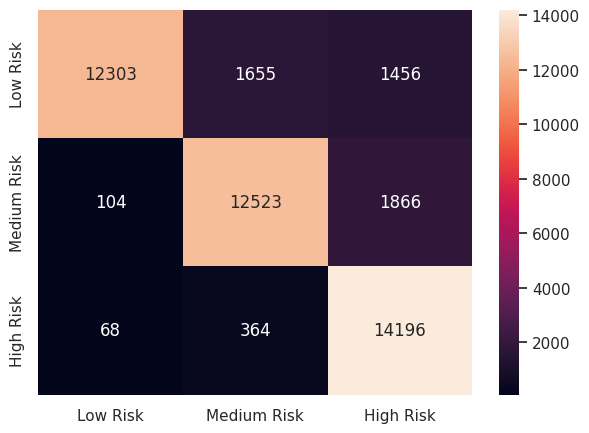


Test confusion matrix:
[[3064 1393  761]
 [ 800 2896 1071]
 [ 208  640 4013]]


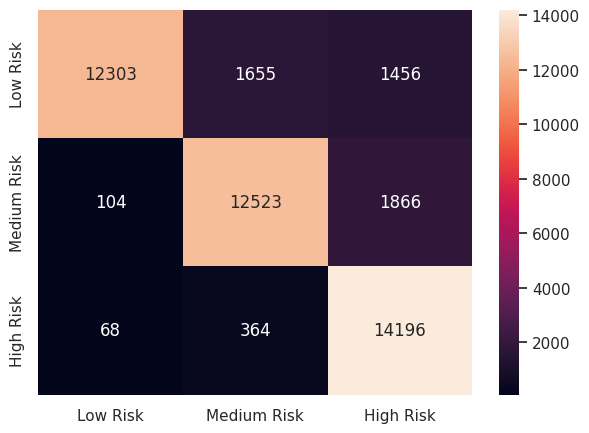


ROC on train data: 0.9649496199464513
ROC on test data: 0.846188991343343
F score is: 0.6691192911496399
Precision is: 0.6779299309879663
Recall is: 0.6717634379630877


In [ ]:
# Parameter grid for xgboost
from xgboost import XGBClassifier
xgb_model=XGBClassifier(max_depth=15, n_estimators= 200, learning_rate=0.01,random_state=42)

xgb_model.fit(data_2,Y_train)

train_class_preds_xg = xgb_model.predict(data_2)
test_class_preds_xg = xgb_model.predict(data_2_test)

## Get the probabilities on train and test
train_preds_xg = xgb_model.predict_proba(data_2)
test_preds_xg = xgb_model.predict_proba(data_2_test)

# Calculating accuracy on train and test
train_accuracy_xg = accuracy_score(Y_train,train_class_preds_xg)
test_accuracy_xg = accuracy_score(Y_test,test_class_preds_xg)

print("The accuracy on train dataset is", train_accuracy_xg)
print("The accuracy on test dataset is", test_accuracy_xg)
print()

# Get the confusion matrices for train and test
train_cm_xg = confusion_matrix(Y_train,train_class_preds_xg)
test_cm_xg = confusion_matrix(Y_test,test_class_preds_xg)

print('Train confusion matrix:')
print( train_cm_xg)
plt.figure(figsize=(7,5))
sns.heatmap(train_cm_xg,annot=True,fmt="d",xticklabels=["Low Risk","Medium Risk","High Risk"],yticklabels=["Low Risk","Medium Risk","High Risk"],linecolor="darkorange")
plt.show()
print()
print('Test confusion matrix:')
print(test_cm_xg)
plt.figure(figsize=(7,5))
sns.heatmap(train_cm_xg,annot=True,fmt="d",xticklabels=["Low Risk","Medium Risk","High Risk"],yticklabels=["Low Risk","Medium Risk","High Risk"],linecolor="darkorange")
plt.show()
print()

# Get the roc_auc score for train and test dataset
train_auc_xg = roc_auc_score(Y_train,train_preds_xg, multi_class='ovo')
test_auc_xg = roc_auc_score(Y_test,test_preds_xg, multi_class='ovo')

print('ROC on train data:', train_auc_xg)
print('ROC on test data:', test_auc_xg)

# Fscore, precision and recall on test data
f1_xg = f1_score(Y_test, test_class_preds_xg, average='weighted')
precision_xg = precision_score(Y_test, test_class_preds_xg, average='weighted')
recall_xg = recall_score(Y_test, test_class_preds_xg, average='weighted')

print("F score is:",f1_xg )
print("Precision is:",precision_xg)
print("Recall is:", recall_xg)

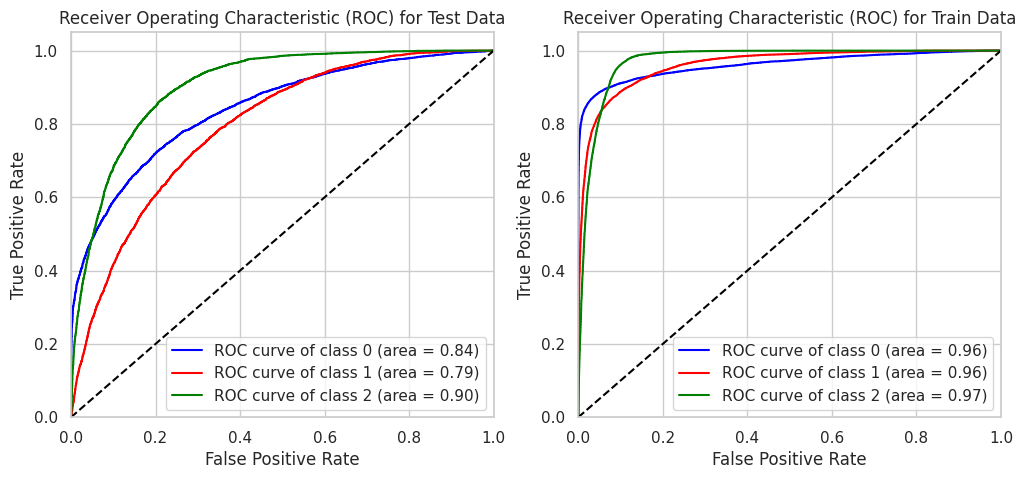

In [ ]:
from sklearn.metrics import roc_curve, auc

test_fpr_xg = dict()
test_tpr_xg = dict()
test_roc_auc_xg = dict()

train_fpr_xg = dict()
train_tpr_xg = dict()
train_roc_auc_xg = dict()

test_n_classes_xg = 3  # Number of classes
train_n_classes_xg = 3  # Number of classes

for i in range(test_n_classes_xg):
    test_fpr_xg[i], test_tpr_xg[i], _ = roc_curve(Y_test,test_preds_xg[:, i], pos_label=i)
    test_roc_auc_xg[i] = auc(test_fpr_xg[i], test_tpr_xg[i])

for i in range(train_n_classes_xg):
    train_fpr_xg[i], train_tpr_xg[i], _ = roc_curve(Y_train,train_preds_xg[:, i], pos_label=i)
    train_roc_auc_xg[i] = auc(train_fpr_xg[i], train_tpr_xg[i])


plt.figure(figsize=(12,5))
plt.subplot(1, 2, 1)
colors = ['blue', 'red', 'green']
for i, color in zip(range(test_n_classes_xg), colors):
    plt.plot(test_fpr_xg[i], test_tpr_xg[i], color=color,label='ROC curve of class {0} (area = {1:0.2f})'.format(i, test_roc_auc_xg[i]))
plt.plot([0, 1], [0, 1], color='black', linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) for Test Data')
plt.legend()

plt.subplot(1, 2, 2)
colors = ['blue', 'red', 'green']
for i, color in zip(range(train_n_classes_xg), colors):
    plt.plot(train_fpr_xg[i], train_tpr_xg[i], color=color,label='ROC curve of class {0} (area = {1:0.2f})'.format(i, train_roc_auc_xg[i]))
plt.plot([0, 1], [0, 1], color='black', linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) for Train Data')
plt.legend()

plt.show()

## Logistic Regression

**With PCA**

The accuracy on train dataset is 0.6303356910295274
The accuracy on test dataset is 0.6236696753334231

Train confusion matrix:
[[ 9649  3329  2436]
 [ 4444  6610  3439]
 [  928  1887 11813]]


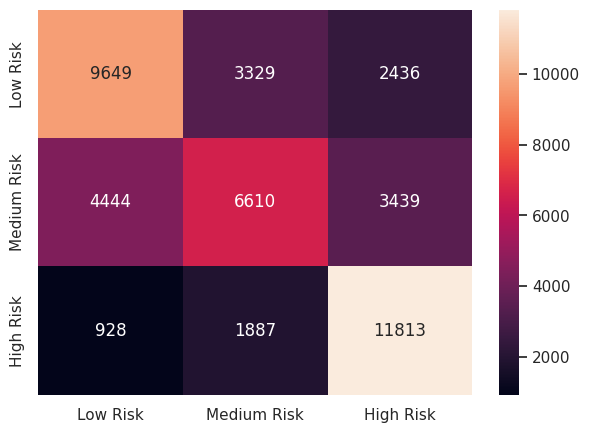


Test confusion matrix:
[[3226 1155  837]
 [1441 2163 1163]
 [ 315  676 3870]]


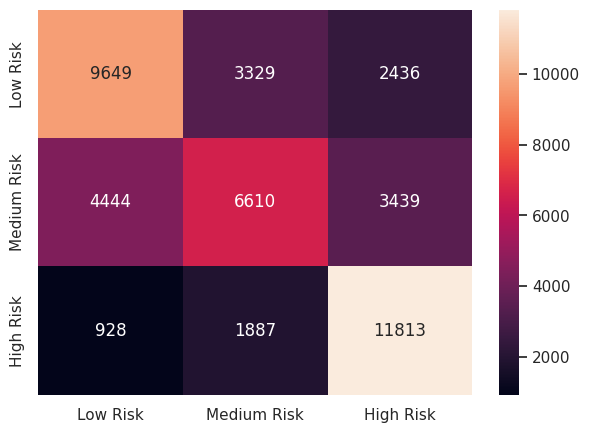


ROC on train data: 0.8072654691651765
ROC on test data: 0.7997883502238009
F score is: 0.6170418511203448
Precision is: 0.6173532922031811
Recall is: 0.6236696753334231


In [ ]:
from sklearn.linear_model import LogisticRegression
logistic_model_pca=LogisticRegression(max_iter=5000,solver ='lbfgs',penalty = 'l2',C =10)

logistic_model_pca.fit(pca_transformed,Y_train)

train_class_preds_lr_pca = logistic_model_pca.predict(pca_transformed)
test_class_preds_lr_pca = logistic_model_pca.predict(pca_transformed_test)

## Get the probabilities on train and test
train_preds_lr_pca = logistic_model_pca.predict_proba(pca_transformed)
test_preds_lr_pca = logistic_model_pca.predict_proba(pca_transformed_test)

# Calculating accuracy on train and test
train_accuracy_lr_pca = accuracy_score(Y_train,train_class_preds_lr_pca)
test_accuracy_lr_pca = accuracy_score(Y_test,test_class_preds_lr_pca)

print("The accuracy on train dataset is", train_accuracy_lr_pca)
print("The accuracy on test dataset is", test_accuracy_lr_pca)
print()

# Get the confusion matrices for train and test
train_cm_lr_pca = confusion_matrix(Y_train,train_class_preds_lr_pca)
test_cm_lr_pca = confusion_matrix(Y_test,test_class_preds_lr_pca )

print('Train confusion matrix:')
print( train_cm_lr_pca)
plt.figure(figsize=(7,5))
sns.heatmap(train_cm_lr_pca,annot=True,fmt="d",xticklabels=["Low Risk","Medium Risk","High Risk"],yticklabels=["Low Risk","Medium Risk","High Risk"],linecolor="darkorange")
plt.show()
print()
print('Test confusion matrix:')
print(test_cm_lr_pca)
plt.figure(figsize=(7,5))
sns.heatmap(train_cm_lr_pca,annot=True,fmt="d",xticklabels=["Low Risk","Medium Risk","High Risk"],yticklabels=["Low Risk","Medium Risk","High Risk"],linecolor="darkorange")
plt.show()
print()

# Get the roc_auc score for train and test dataset
train_auc_lr_pca = roc_auc_score(Y_train,train_preds_lr_pca, multi_class='ovo')
test_auc_lr_pca = roc_auc_score(Y_test,test_preds_lr_pca, multi_class='ovo')

print('ROC on train data:', train_auc_lr_pca)
print('ROC on test data:', test_auc_lr_pca)

# Fscore, precision and recall on test data
f1_lr_pca = f1_score(Y_test, test_class_preds_lr_pca, average='weighted')
precision_lr_pca = precision_score(Y_test, test_class_preds_lr_pca, average='weighted')
recall_lr_pca = recall_score(Y_test, test_class_preds_lr_pca, average='weighted')

print("F score is:",f1_lr_pca )
print("Precision is:",precision_lr_pca)
print("Recall is:", recall_lr_pca)

**Without PCA**

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


The accuracy on train dataset is 0.632850566969799
The accuracy on test dataset is 0.6264313619830257

Train confusion matrix:
[[ 9656  3304  2454]
 [ 4402  6677  3414]
 [  891  1886 11851]]


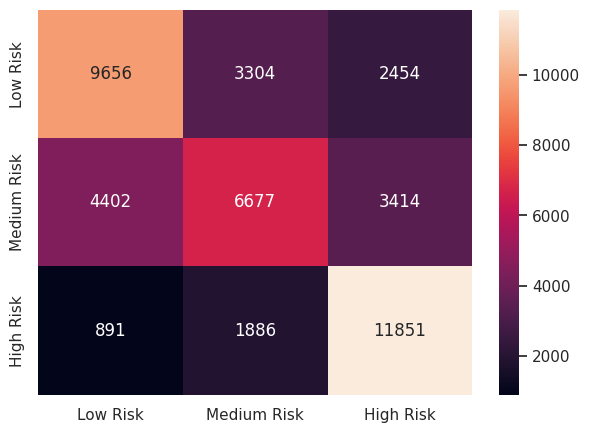


Test confusion matrix:
[[3242 1132  844]
 [1440 2177 1150]
 [ 311  669 3881]]


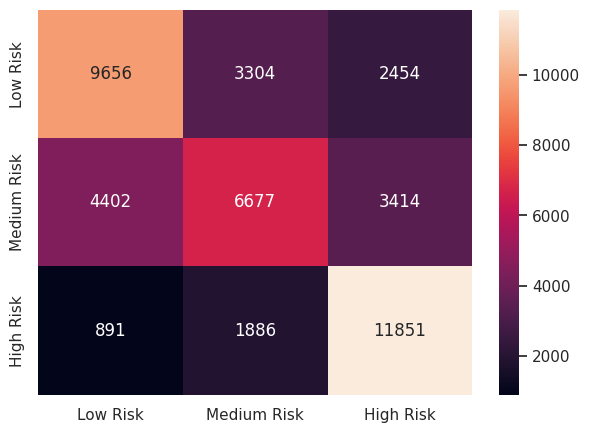


ROC on train data: 0.8097302293542424
ROC on test data: 0.802968300005837
F score is: 0.6197829817705198
Precision is: 0.6202370020007717
Recall is: 0.6264313619830257


In [ ]:
from sklearn.linear_model import LogisticRegression
logistic_model=LogisticRegression(max_iter=5000,solver ='lbfgs',penalty = 'l2',C =10)

logistic_model.fit(data_2,Y_train)

train_class_preds_lr = logistic_model.predict(data_2)
test_class_preds_lr = logistic_model.predict(data_2_test)

## Get the probabilities on train and test
train_preds_lr = logistic_model.predict_proba(data_2)
test_preds_lr = logistic_model.predict_proba(data_2_test)

# Calculating accuracy on train and test
train_accuracy_lr = accuracy_score(Y_train,train_class_preds_lr)
test_accuracy_lr = accuracy_score(Y_test,test_class_preds_lr)

print("The accuracy on train dataset is", train_accuracy_lr)
print("The accuracy on test dataset is", test_accuracy_lr)
print()

# Get the confusion matrices for train and test
train_cm_lr = confusion_matrix(Y_train,train_class_preds_lr)
test_cm_lr = confusion_matrix(Y_test,test_class_preds_lr)

print('Train confusion matrix:')
print( train_cm_lr)
plt.figure(figsize=(7,5))
sns.heatmap(train_cm_lr,annot=True,fmt="d",xticklabels=["Low Risk","Medium Risk","High Risk"],yticklabels=["Low Risk","Medium Risk","High Risk"],linecolor="darkorange")
plt.show()
print()
print('Test confusion matrix:')
print(test_cm_lr)
plt.figure(figsize=(7,5))
sns.heatmap(train_cm_lr,annot=True,fmt="d",xticklabels=["Low Risk","Medium Risk","High Risk"],yticklabels=["Low Risk","Medium Risk","High Risk"],linecolor="darkorange")
plt.show()
print()

# Get the roc_auc score for train and test dataset
train_auc_lr = roc_auc_score(Y_train,train_preds_lr, multi_class='ovo')
test_auc_lr = roc_auc_score(Y_test,test_preds_lr, multi_class='ovo')

print('ROC on train data:', train_auc_lr)
print('ROC on test data:', test_auc_lr)

# Fscore, precision and recall on test data
f1_lr = f1_score(Y_test, test_class_preds_lr, average='weighted')
precision_lr = precision_score(Y_test, test_class_preds_lr, average='weighted')
recall_lr = recall_score(Y_test, test_class_preds_lr, average='weighted')

print("F score is:",f1_lr)
print("Precision is:",precision_lr)
print("Recall is:", recall_lr)

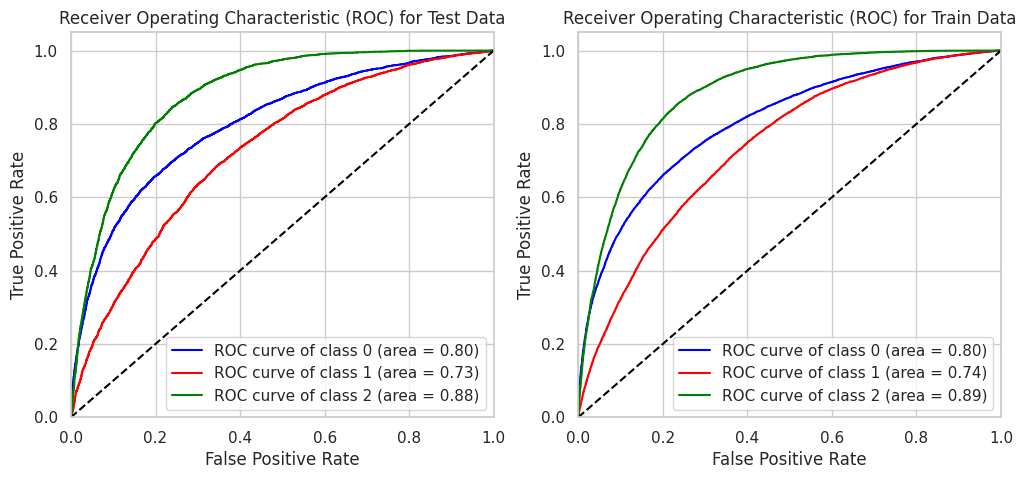

In [ ]:
from sklearn.metrics import roc_curve, auc

test_fpr_lr = dict()
test_tpr_lr = dict()
test_roc_auc_lr = dict()

train_fpr_lr = dict()
train_tpr_lr = dict()
train_roc_auc_lr = dict()

test_n_classes_lr = 3  # Number of classes
train_n_classes_lr = 3  # Number of classes

for i in range(test_n_classes_lr):
    test_fpr_lr[i], test_tpr_lr[i], _ = roc_curve(Y_test,test_preds_lr[:, i], pos_label=i)
    test_roc_auc_lr[i] = auc(test_fpr_lr[i], test_tpr_lr[i])

for i in range(train_n_classes_lr):
    train_fpr_lr[i], train_tpr_lr[i], _ = roc_curve(Y_train,train_preds_lr[:, i], pos_label=i)
    train_roc_auc_lr[i] = auc(train_fpr_lr[i], train_tpr_lr[i])


plt.figure(figsize=(12,5))
plt.subplot(1, 2, 1)
colors = ['blue', 'red', 'green']
for i, color in zip(range(test_n_classes_lr), colors):
    plt.plot(test_fpr_lr[i], test_tpr_lr[i], color=color,label='ROC curve of class {0} (area = {1:0.2f})'.format(i, test_roc_auc_lr[i]))
plt.plot([0, 1], [0, 1], color='black', linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) for Test Data')
plt.legend()

plt.subplot(1, 2, 2)
colors = ['blue', 'red', 'green']
for i, color in zip(range(train_n_classes_lr), colors):
    plt.plot(train_fpr_lr[i], train_tpr_lr[i], color=color,label='ROC curve of class {0} (area = {1:0.2f})'.format(i, train_roc_auc_lr[i]))
plt.plot([0, 1], [0, 1], color='black', linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) for Train Data')
plt.legend()

plt.show()

**Decision Tree**

**With PCA**

The accuracy on train dataset is 0.6598181205793197
The accuracy on test dataset is 0.5499124343257443

Train confusion matrix:
[[ 9972  3266  2176]
 [ 3364  8224  2905]
 [ 1323  2116 11189]]


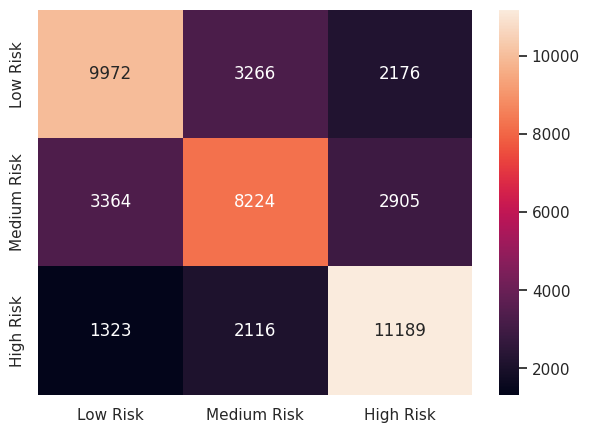


Test confusion matrix:
[[2891 1458  869]
 [1491 2032 1244]
 [ 563 1057 3241]]


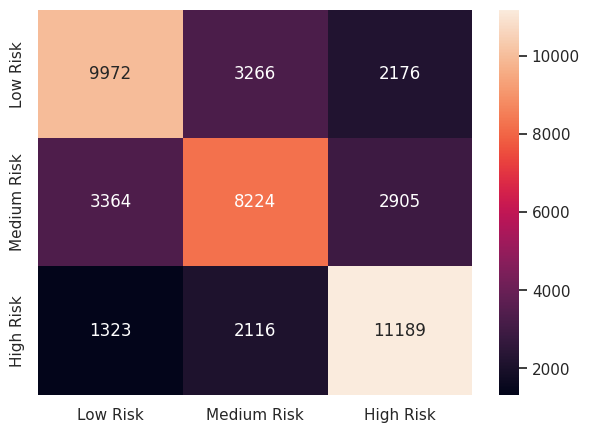


ROC on train data: 0.8374174092780408
ROC on test data: 0.7297263535980255
F score is: 0.5478402751507304
Precision is: 0.5471834912992916
Recall is: 0.5499124343257442


In [ ]:
from sklearn.tree import DecisionTreeClassifier
decision_tree_model_pca=DecisionTreeClassifier(max_depth= 15,min_samples_leaf= 40,min_samples_split= 50,criterion='gini',random_state=42)

decision_tree_model_pca.fit(pca_transformed,Y_train)

train_class_preds_dc_pca = decision_tree_model_pca.predict(pca_transformed)
test_class_preds_dc_pca = decision_tree_model_pca.predict(pca_transformed_test)

## Get the probabilities on train and test
train_preds_dc_pca = decision_tree_model_pca.predict_proba(pca_transformed)
test_preds_dc_pca = decision_tree_model_pca.predict_proba(pca_transformed_test)

# Calculating accuracy on train and test
train_accuracy_dc_pca = accuracy_score(Y_train,train_class_preds_dc_pca)
test_accuracy_dc_pca = accuracy_score(Y_test,test_class_preds_dc_pca)

print("The accuracy on train dataset is", train_accuracy_dc_pca)
print("The accuracy on test dataset is", test_accuracy_dc_pca)
print()

# Get the confusion matrices for train and test
train_cm_dc_pca = confusion_matrix(Y_train,train_class_preds_dc_pca)
test_cm_dc_pca = confusion_matrix(Y_test,test_class_preds_dc_pca )

print('Train confusion matrix:')
print( train_cm_dc_pca)
plt.figure(figsize=(7,5))
sns.heatmap(train_cm_dc_pca,annot=True,fmt="d",xticklabels=["Low Risk","Medium Risk","High Risk"],yticklabels=["Low Risk","Medium Risk","High Risk"],linecolor="darkorange")
plt.show()
print()
print('Test confusion matrix:')
print(test_cm_dc_pca)
plt.figure(figsize=(7,5))
sns.heatmap(train_cm_dc_pca,annot=True,fmt="d",xticklabels=["Low Risk","Medium Risk","High Risk"],yticklabels=["Low Risk","Medium Risk","High Risk"],linecolor="darkorange")
plt.show()
print()

# Get the roc_auc score for train and test dataset
train_auc_dc_pca = roc_auc_score(Y_train,train_preds_dc_pca, multi_class='ovo')
test_auc_dc_pca = roc_auc_score(Y_test,test_preds_dc_pca, multi_class='ovo')

print('ROC on train data:', train_auc_dc_pca)
print('ROC on test data:', test_auc_dc_pca)

# Fscore, precision and recall on test data
f1_dc_pca = f1_score(Y_test, test_class_preds_dc_pca, average='weighted')
precision_dc_pca = precision_score(Y_test, test_class_preds_dc_pca, average='weighted')
recall_dc_pca = recall_score(Y_test, test_class_preds_dc_pca, average='weighted')

print("F score is:",f1_dc_pca )
print("Precision is:",precision_dc_pca)
print("Recall is:", recall_dc_pca)

**Without PCA**

The accuracy on train dataset is 0.6921971483103178
The accuracy on test dataset is 0.6473124073824599

Train confusion matrix:
[[ 9704  3483  2227]
 [ 2637  8929  2927]
 [  716  1718 12194]]


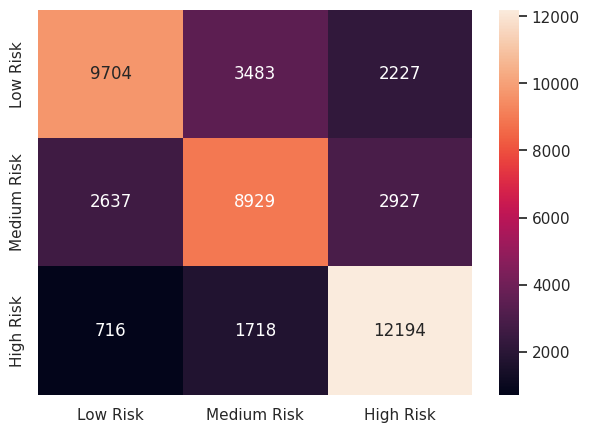


Test confusion matrix:
[[3080 1325  813]
 [1061 2649 1057]
 [ 287  693 3881]]


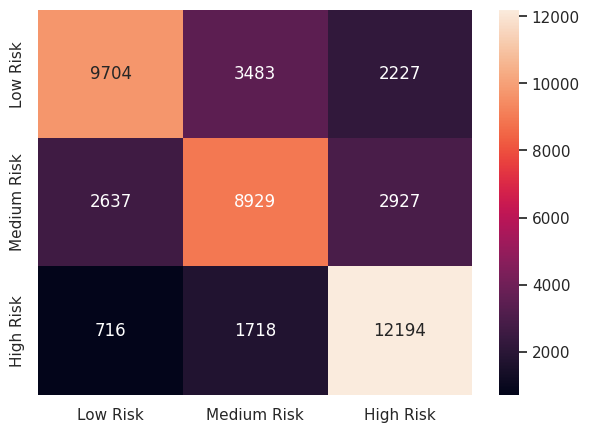


ROC on train data: 0.8591586975550042
ROC on test data: 0.8205187395699601
F score is: 0.6442705008662017
Precision is: 0.6476934219404477
Recall is: 0.6473124073824599


In [ ]:
from sklearn.tree import DecisionTreeClassifier
decision_tree_model=DecisionTreeClassifier(max_depth= 15,min_samples_leaf= 40,min_samples_split= 50,criterion='gini',random_state=42)

decision_tree_model.fit(data_2,Y_train)

train_class_preds_dc = decision_tree_model.predict(data_2)
test_class_preds_dc = decision_tree_model.predict(data_2_test)

## Get the probabilities on train and test
train_preds_dc = decision_tree_model.predict_proba(data_2)
test_preds_dc = decision_tree_model.predict_proba(data_2_test)

# Calculating accuracy on train and test
train_accuracy_dc = accuracy_score(Y_train,train_class_preds_dc)
test_accuracy_dc = accuracy_score(Y_test,test_class_preds_dc)

print("The accuracy on train dataset is", train_accuracy_dc)
print("The accuracy on test dataset is", test_accuracy_dc)
print()

# Get the confusion matrices for train and test
train_cm_dc = confusion_matrix(Y_train,train_class_preds_dc)
test_cm_dc = confusion_matrix(Y_test,test_class_preds_dc)

print('Train confusion matrix:')
print( train_cm_dc)
plt.figure(figsize=(7,5))
sns.heatmap(train_cm_dc,annot=True,fmt="d",xticklabels=["Low Risk","Medium Risk","High Risk"],yticklabels=["Low Risk","Medium Risk","High Risk"],linecolor="darkorange")
plt.show()
print()
print('Test confusion matrix:')
print(test_cm_dc)
plt.figure(figsize=(7,5))
sns.heatmap(train_cm_dc,annot=True,fmt="d",xticklabels=["Low Risk","Medium Risk","High Risk"],yticklabels=["Low Risk","Medium Risk","High Risk"],linecolor="darkorange")
plt.show()
print()

# Get the roc_auc score for train and test dataset
train_auc_dc = roc_auc_score(Y_train,train_preds_dc, multi_class='ovo')
test_auc_dc = roc_auc_score(Y_test,test_preds_dc, multi_class='ovo')

print('ROC on train data:', train_auc_dc)
print('ROC on test data:', test_auc_dc)

# Fscore, precision and recall on test data
f1_dc = f1_score(Y_test, test_class_preds_dc, average='weighted')
precision_dc = precision_score(Y_test, test_class_preds_dc, average='weighted')
recall_dc = recall_score(Y_test, test_class_preds_dc, average='weighted')

print("F score is:",f1_dc )
print("Precision is:",precision_dc)
print("Recall is:", recall_dc)

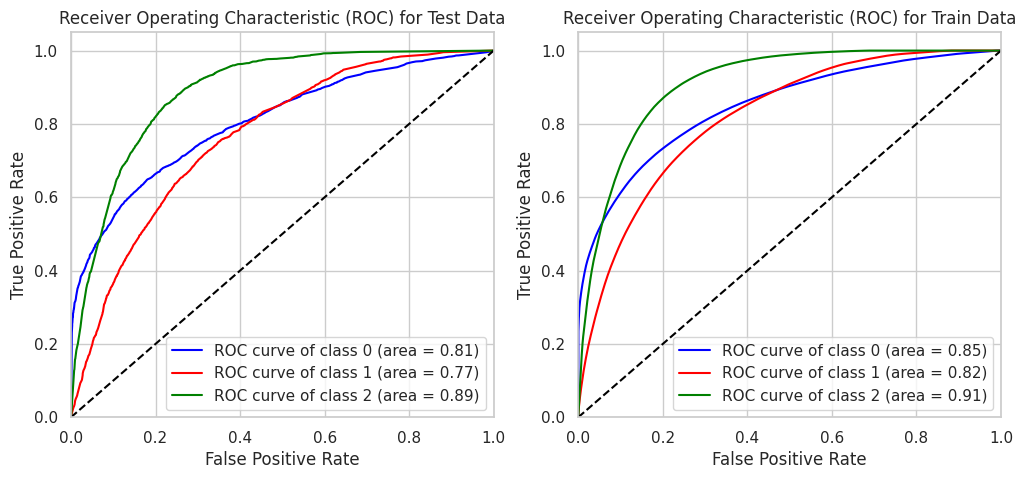

In [ ]:
from sklearn.metrics import roc_curve, auc

test_fpr_dc = dict()
test_tpr_dc = dict()
test_roc_auc_dc = dict()

train_fpr_dc = dict()
train_tpr_dc = dict()
train_roc_auc_dc = dict()

test_n_classes_dc = 3  # Number of classes
train_n_classes_dc = 3  # Number of classes

for i in range(test_n_classes_dc):
    test_fpr_dc[i], test_tpr_dc[i], _ = roc_curve(Y_test,test_preds_dc[:, i], pos_label=i)
    test_roc_auc_dc[i] = auc(test_fpr_dc[i], test_tpr_dc[i])

for i in range(train_n_classes_dc):
    train_fpr_dc[i], train_tpr_dc[i], _ = roc_curve(Y_train,train_preds_dc[:, i], pos_label=i)
    train_roc_auc_dc[i] = auc(train_fpr_dc[i], train_tpr_dc[i])


plt.figure(figsize=(12,5))
plt.subplot(1, 2, 1)
colors = ['blue', 'red', 'green']
for i, color in zip(range(test_n_classes_dc), colors):
    plt.plot(test_fpr_dc[i], test_tpr_dc[i], color=color,label='ROC curve of class {0} (area = {1:0.2f})'.format(i, test_roc_auc_dc[i]))
plt.plot([0, 1], [0, 1], color='black', linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) for Test Data')
plt.legend()

plt.subplot(1, 2, 2)
colors = ['blue', 'red', 'green']
for i, color in zip(range(train_n_classes_dc), colors):
    plt.plot(train_fpr_dc[i], train_tpr_dc[i], color=color,label='ROC curve of class {0} (area = {1:0.2f})'.format(i, train_roc_auc_dc[i]))
plt.plot([0, 1], [0, 1], color='black', linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) for Train Data')
plt.legend()

plt.show()

**Gradient Boosting**

**With PCA**

The accuracy on train dataset is 0.998989558773998
The accuracy on test dataset is 0.5977367641115452

Train confusion matrix:
[[15377     8    29]
 [    0 14485     8]
 [    0     0 14628]]


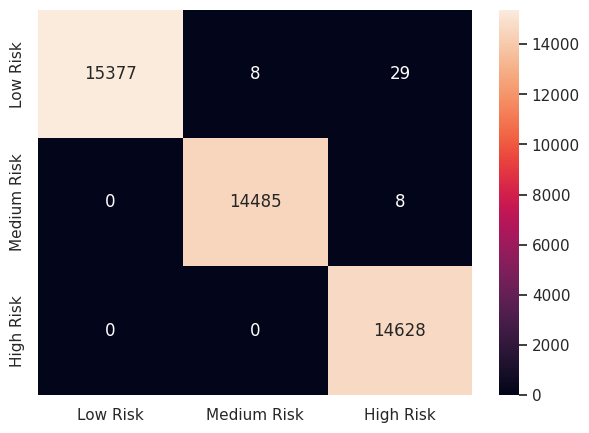


Test confusion matrix:
[[3082 1385  751]
 [1370 2249 1148]
 [ 469  849 3543]]


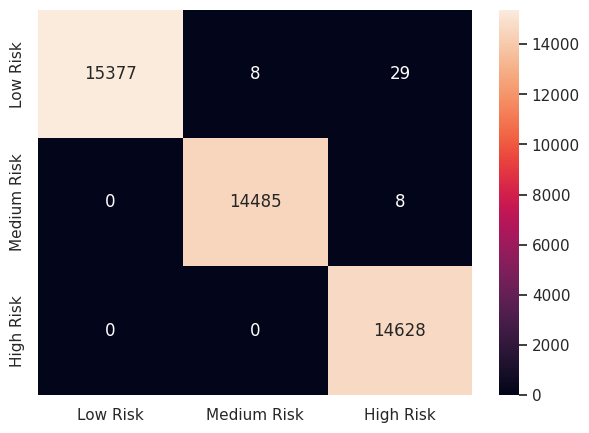


ROC on train data: 0.999999476639888
ROC on test data: 0.7813533650617247
F score is: 0.595011205277363
Precision is: 0.5943840992674553
Recall is: 0.5977367641115452


In [ ]:
# Parameter grid for Gradient Boost
from sklearn.ensemble import GradientBoostingClassifier
gb_model_pca=GradientBoostingClassifier(max_depth=15, n_estimators= 200, learning_rate=0.01,random_state=42)

gb_model_pca.fit(pca_transformed,Y_train)

train_class_preds_g_pca = gb_model_pca.predict(pca_transformed)
test_class_preds_g_pca = gb_model_pca.predict(pca_transformed_test)


## Get the probabilities on train and test
train_preds_g_pca = gb_model_pca.predict_proba(pca_transformed)
test_preds_g_pca = gb_model_pca.predict_proba(pca_transformed_test)

# Calculating accuracy on train and test
train_accuracy_g_pca = accuracy_score(Y_train,train_class_preds_g_pca)
test_accuracy_g_pca = accuracy_score(Y_test,test_class_preds_g_pca)

print("The accuracy on train dataset is", train_accuracy_g_pca)
print("The accuracy on test dataset is", test_accuracy_g_pca)
print()

# Get the confusion matrices for train and test
train_cm_g_pca = confusion_matrix(Y_train,train_class_preds_g_pca)
test_cm_g_pca = confusion_matrix(Y_test,test_class_preds_g_pca)

print('Train confusion matrix:')
print( train_cm_g_pca)
plt.figure(figsize=(7,5))
sns.heatmap(train_cm_g_pca,annot=True,fmt="d",xticklabels=["Low Risk","Medium Risk","High Risk"],yticklabels=["Low Risk","Medium Risk","High Risk"],linecolor="darkorange")
plt.show()
print()
print('Test confusion matrix:')
print(test_cm_g_pca)
plt.figure(figsize=(7,5))
sns.heatmap(train_cm_g_pca,annot=True,fmt="d",xticklabels=["Low Risk","Medium Risk","High Risk"],yticklabels=["Low Risk","Medium Risk","High Risk"],linecolor="darkorange")
plt.show()
print()

# Get the roc_auc score for train and test dataset
train_auc_g_pca = roc_auc_score(Y_train,train_preds_g_pca, multi_class='ovo')
test_auc_g_pca = roc_auc_score(Y_test,test_preds_g_pca, multi_class='ovo')

print('ROC on train data:', train_auc_g_pca)
print('ROC on test data:', test_auc_g_pca)

# Fscore, precision and recall on test data
f1_g_pca = f1_score(Y_test, test_class_preds_g_pca, average='weighted')
precision_g_pca = precision_score(Y_test, test_class_preds_g_pca, average='weighted')
recall_g_pca = recall_score(Y_test, test_class_preds_g_pca, average='weighted')
print("F score is:",f1_g_pca )
print("Precision is:",precision_g_pca)
print("Recall is:", recall_g_pca)

**Without PCA**

The accuracy on train dataset is 0.9187605254294375
The accuracy on test dataset is 0.6692711841573488

Train confusion matrix:
[[13221  1065  1128]
 [   33 13160  1300]
 [   17    75 14536]]


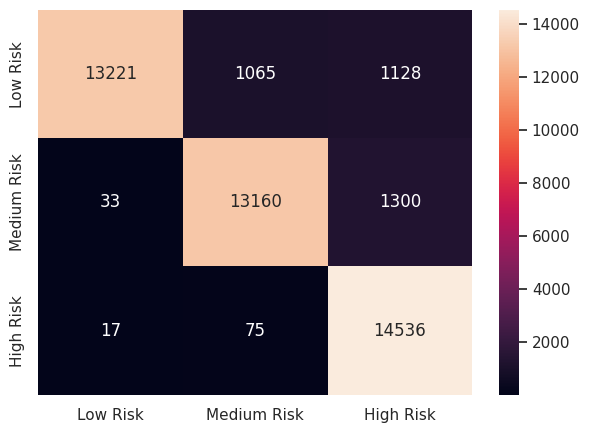


Test confusion matrix:
[[3081 1386  751]
 [ 850 2885 1032]
 [ 244  647 3970]]


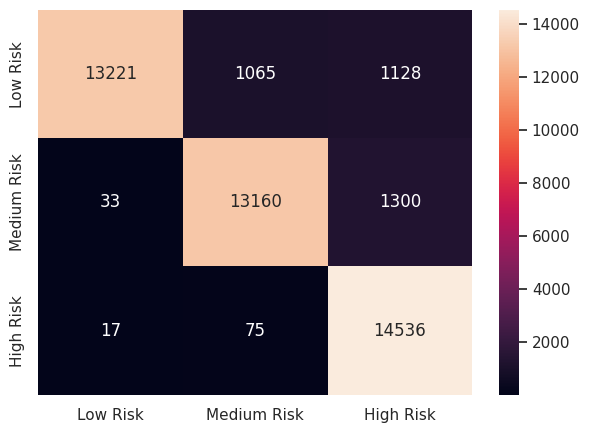


ROC on train data: 0.9849252198421158
ROC on test data: 0.842180315533203
F score is: 0.6668123189598688
Precision is: 0.6736878720494498
Recall is: 0.6692711841573488


In [ ]:
# Parameter grid for Gradient Boost
from sklearn.ensemble import GradientBoostingClassifier
gb_model=GradientBoostingClassifier(max_depth=15, n_estimators= 200, learning_rate=0.01,random_state=42)

gb_model.fit(data_2,Y_train)

train_class_preds_g = gb_model.predict(data_2)
test_class_preds_g = gb_model.predict(data_2_test)


## Get the probabilities on train and test
train_preds_g= gb_model.predict_proba(data_2)
test_preds_g = gb_model.predict_proba(data_2_test)

# Calculating accuracy on train and test
train_accuracy_g = accuracy_score(Y_train,train_class_preds_g)
test_accuracy_g = accuracy_score(Y_test,test_class_preds_g)

print("The accuracy on train dataset is", train_accuracy_g)
print("The accuracy on test dataset is", test_accuracy_g)
print()

# Get the confusion matrices for train and test
train_cm_g = confusion_matrix(Y_train,train_class_preds_g)
test_cm_g = confusion_matrix(Y_test,test_class_preds_g)

print('Train confusion matrix:')
print( train_cm_g)
plt.figure(figsize=(7,5))
sns.heatmap(train_cm_g,annot=True,fmt="d",xticklabels=["Low Risk","Medium Risk","High Risk"],yticklabels=["Low Risk","Medium Risk","High Risk"],linecolor="darkorange")
plt.show()
print()
print('Test confusion matrix:')
print(test_cm_g)
plt.figure(figsize=(7,5))
sns.heatmap(train_cm_g,annot=True,fmt="d",xticklabels=["Low Risk","Medium Risk","High Risk"],yticklabels=["Low Risk","Medium Risk","High Risk"],linecolor="darkorange")
plt.show()
print()

# Get the roc_auc score for train and test dataset
train_auc_g = roc_auc_score(Y_train,train_preds_g, multi_class='ovo')
test_auc_g = roc_auc_score(Y_test,test_preds_g, multi_class='ovo')

print('ROC on train data:', train_auc_g)
print('ROC on test data:', test_auc_g)

# Fscore, precision and recall on test data
f1_g = f1_score(Y_test, test_class_preds_g, average='weighted')
precision_g= precision_score(Y_test, test_class_preds_g, average='weighted')
recall_g = recall_score(Y_test, test_class_preds_g, average='weighted')
print("F score is:",f1_g)
print("Precision is:",precision_g)
print("Recall is:", recall_g)

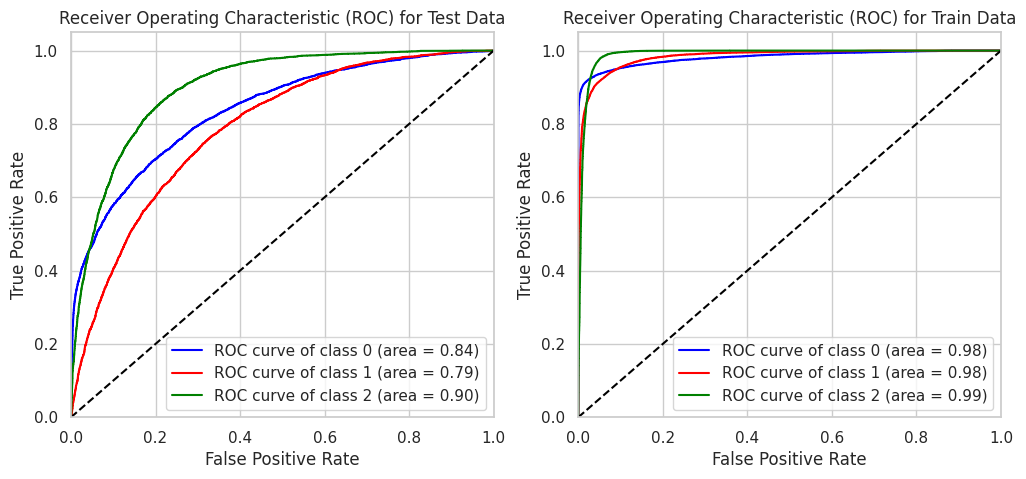

In [ ]:
from sklearn.metrics import roc_curve, auc

test_fpr_gb = dict()
test_tpr_gb = dict()
test_roc_auc_gb = dict()

train_fpr_gb = dict()
train_tpr_gb = dict()
train_roc_auc_gb = dict()

test_n_classes_gb = 3  # Number of classes
train_n_classes_gb = 3  # Number of classes

for i in range(test_n_classes_gb):
    test_fpr_gb[i], test_tpr_gb[i], _ = roc_curve(Y_test,test_preds_g[:, i], pos_label=i)
    test_roc_auc_gb[i] = auc(test_fpr_gb[i], test_tpr_gb[i])

for i in range(train_n_classes_gb):
    train_fpr_gb[i], train_tpr_gb[i], _ = roc_curve(Y_train,train_preds_g[:, i], pos_label=i)
    train_roc_auc_gb[i] = auc(train_fpr_gb[i], train_tpr_gb[i])


plt.figure(figsize=(12,5))
plt.subplot(1, 2, 1)
colors = ['blue', 'red', 'green']
for i, color in zip(range(test_n_classes_gb), colors):
    plt.plot(test_fpr_gb[i], test_tpr_gb[i], color=color,label='ROC curve of class {0} (area = {1:0.2f})'.format(i, test_roc_auc_gb[i]))
plt.plot([0, 1], [0, 1], color='black', linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) for Test Data')
plt.legend()

plt.subplot(1, 2, 2)
colors = ['blue', 'red', 'green']
for i, color in zip(range(train_n_classes_gb), colors):
    plt.plot(train_fpr_gb[i], train_tpr_gb[i], color=color,label='ROC curve of class {0} (area = {1:0.2f})'.format(i, train_roc_auc_gb[i]))
plt.plot([0, 1], [0, 1], color='black', linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) for Train Data')
plt.legend()

plt.show()

In [ ]:
# Making a dataframe of all the scores for every model

scores = [("Random Forest", test_auc_rf*100, test_accuracy_rf*100,f1_rf*100, precision_rf*100, recall_rf*100),
("XG Boost",test_auc_xg*100, test_accuracy_xg*100,f1_xg*100, precision_xg*100, recall_xg*100),
("Logistic Regression",  test_auc_lr*100, test_accuracy_lr*100,f1_lr*100, precision_lr*100, recall_lr*100),
("Decision Tree",  test_auc_dc*100, test_accuracy_dc*100,f1_dc*100, precision_dc*100, recall_dc*100),
("Gradient Boosting",  test_auc_g*100, test_accuracy_g*100,f1_g*100, precision_g*100, recall_g*100)]

Scores_df =pd.DataFrame(data = scores, columns=['Model Name',  'Test ROC', 'Test Accuracy','F-Score', 'Precision','Recall',])
Scores_df.set_index('Model Name', inplace = True)

Scores_df

,Test ROC,Test Accuracy,F-Score,Precision,Recall
Model Name,,,,,
Random Forest,83.412806,66.354574,65.952164,66.868673,66.354574
XG Boost,84.618899,67.176344,66.911929,67.792993,67.176344
Logistic Regression,80.296830,62.643136,61.978298,62.023700,62.643136
Decision Tree,82.051874,64.731241,64.427050,64.769342,64.731241
Gradient Boosting,84.218032,66.927118,66.681232,67.368787,66.927118
